# Credit Card Users Churn Prediction:

OBJECTIVE:

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not/improve their services so clients don't renounce their credit cards
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Import necessary libraries:

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ParameterGrid

## Read the dataset:

In [119]:
bank_df=pd.read_csv('BankChurners.csv')
df = bank_df.copy() # Copying data frame to another variable to avoid any changes to original data
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

## Explore the data:

In [120]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 10127 rows and 21 columns.


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Convert objects to categories:

In [122]:
cat_cols = ['Attrition_Flag', 'Gender','Education_Level', 'Marital_Status','Income_Category','Card_Category']
df[cat_cols] = df[cat_cols].astype('category')
df.info() # Uses less memory 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [123]:
np.round(df, decimals=2) # Round all columns that have numeric values for ease of legibility

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                      1.34             1144              42   
1                      1.54             1291              33   
2                      2.59             1887              20   
3                      1.40             1171              20   
4                      2.17              816              28   
...                     ...              ...             ...   
10122                  0.70            15476             117   
10123                  0.80             8764              69   
10124  

In [124]:
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

In [125]:
df.describe(include=['category']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

 OBSERVATIONS:

* Clientnum: This seems to be a unique ID reference number for the clients assigned by the bank. This can be removed and we can use the row numbers as our line reference number. 
* Customer_Age: There seems to be some input errors in this column. The mean is 46 while the minimum is 26. The mean and median are quite close so distribution should be fairly normal.
* Dependent_count: The mean is 2.34 and the minimum is 0.
* Months_on_book: The mean is 36 as is the median. Explore more in EDA portion of the notebook.
* Total_Relationship_Count: The minimum is 1 product while the mean is 3.81. The median is 4.0 so this all seems reasonable. 
* Months_Inactive_12_mon: The minimum the client is inactive is 0 and the mean is approximately 2 months. This is relatively low and a good reflection of the bank's relationship with clients.
* Contacts_Count_12_mon: The minimum is 0 interactions with the clients. The mean is 2.45 which is low considering that shows the bank has had only 2 or 3 contacts with a client within a 12 month time frame.
* Credit_Limit: The minimum value is 1,438. The mean is 8,361 and the median is 4,549. I want to explore this further in EDA as it compares to income and other factors.
* Total_Revolving_Bal: The minimum balance a client has is 0. The average is 1,162 and the median is 1,276. More to explore here in EDA as it pertains to total balance ie how close the client stays at their limit.
* Avg_Open_To_Buy: The minimum a client has is 3.0. The mean is 7,469 while the median is 3,474 suggesting skewed data.
* Total_Amt_Chng_Q4_Q1: The minimum ratio is 0. The mean is .76 and the median is .74. I'm not sure how relevant this column will be with regard to the information we are trying to discern. EDA will give us more direction in that regard.
* Total_Trans_Amt: The minimum a client has spent in the previous 12 months is 510 dollars. The mean average is 4,404 and the median is 3,899. I'm curious how this compares to their income and other credit card factors. 
* Total_Trans_Ct: The minimum transaction count for a client is 10 while the average is approximately 65. This can also be cross referenced with the the total transaction amount to discern what the clients are spending per transaction.
* Total_Ct_Chng_Q4_Q1: The minimum is 0 and the mean is .71. This is another column I'm unsure how useful it will prove to what we are trying to discern. EDA will hopefully give us more direction.
* Avg_Utilization_Ratio: The minimum is 0 while the average is .27 and the median is .17. This suggests skewed data which we can confirm in EDA.
* Attrition_Flag has 2 unique responses with the most popular being "Existing customer".
* Gender has 2 unique responses with "F" (presumably meaning female) being the most common.
* Education_Level has 7 unique responses with "Graduate" being the most popular.
* Marital_Status has 4 unique responses with "Married" being the most common.
* Income_Category has 6 unique responses with the most common as "Less that 40k".
* Card_Category has 4 unique responses with "Blue" being the most common.

In [126]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

OBSERVATIONS: 

* There are 3 columns with more the 5000 unique values and 2 with over a thousand values. Something for us to decide after EDA if we need to address.

In [127]:
df.isnull().sum().sort_values(ascending=False) #By using "false", the first values displayed contain the greatest number of missing values

CLIENTNUM                   0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Total_Relationship_Count    0
Attrition_Flag              0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Avg_Utilization_Ratio       0
dtype: int64

OBSERVATIONS:

* No missing values.

In [128]:
df.isnull().values.any() # Check for any NaN values 

False

### Remove "CLIENTNUM" column and convert all column names to all lower case characters:

In [129]:
df.pop('CLIENTNUM') # Remove CLIENTNUM column as it is repetitive and it's easier to use internal row numbers 
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [130]:
df= df.rename(columns=str.lower) # Convert column names to all lower case letters to make it more fluid to read the column names
df.head()

attrition_flag  customer_age gender  dependent_count education_level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  marital_status income_category card_category  months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Value counts for various columns:

In [131]:
df['customer_age'].value_counts() # Checking value counts for various columns looking for out of context variables that may need correction.

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
58    157
59    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
70      1
73      1
Name: customer_age, dtype: int64

In [132]:
df['dependent_count'].value_counts() 

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: dependent_count, dtype: int64

In [133]:
df['months_on_book'].value_counts() 

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: months_on_book, dtype: int64

In [134]:
df['credit_limit'].value_counts() 

34516.0    508
1438.3     507
15987.0     18
9959.0      18
23981.0     12
          ... 
10587.0      1
15340.0      1
34427.0      1
4975.0       1
3741.0       1
Name: credit_limit, Length: 6205, dtype: int64

In [135]:
df['total_revolving_bal'].value_counts()

0       2470
2517     508
1965      12
1480      12
1664      11
        ... 
709        1
637        1
1809       1
613        1
1269       1
Name: total_revolving_bal, Length: 1974, dtype: int64

In [136]:
df['avg_open_to_buy'].value_counts()

1438.3     324
34516.0     98
31999.0     26
787.0        8
701.0        7
          ... 
16177.0      1
33791.0      1
5843.0       1
29.0         1
1570.0       1
Name: avg_open_to_buy, Length: 6813, dtype: int64

In [137]:
df['total_amt_chng_q4_q1'].value_counts()

0.791    36
0.712    34
0.743    34
0.718    33
0.735    33
         ..
1.585     1
1.198     1
1.430     1
2.275     1
1.787     1
Name: total_amt_chng_q4_q1, Length: 1158, dtype: int64

In [138]:
df['total_trans_amt'].value_counts()

4509     11
4253     11
4518     10
2229     10
4042      9
         ..
804       1
2869      1
10468     1
15163     1
8192      1
Name: total_trans_amt, Length: 5033, dtype: int64

In [139]:
df['total_trans_ct'].value_counts()

81     208
75     203
71     203
69     202
82     202
      ... 
11       2
134      1
132      1
138      1
139      1
Name: total_trans_ct, Length: 126, dtype: int64

In [140]:
df['total_ct_chng_q4_q1'].value_counts()

0.667    171
1.000    166
0.500    161
0.750    156
0.600    113
        ... 
0.859      1
2.083      1
0.473      1
1.075      1
1.074      1
Name: total_ct_chng_q4_q1, Length: 830, dtype: int64

In [141]:
df['avg_utilization_ratio'].value_counts()

0.000    2470
0.073      44
0.057      33
0.048      32
0.060      30
         ... 
0.335       1
0.985       1
0.949       1
0.818       1
0.972       1
Name: avg_utilization_ratio, Length: 964, dtype: int64

In [142]:
df['education_level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

In [143]:
unknown_el = df.query('education_level == "Unknown"')
unknown_el.head()

attrition_flag  customer_age gender  dependent_count education_level  \
6   Existing Customer            51      M                4         Unknown   
11  Existing Customer            65      M                1         Unknown   
15  Existing Customer            44      M                4         Unknown   
17  Existing Customer            41      M                3         Unknown   
23  Existing Customer            47      F                4         Unknown   

   marital_status income_category card_category  months_on_book  \
6         Married         $120K +          Gold              46   
11        Married     $40K - $60K          Blue              54   
15        Unknown    $80K - $120K          Blue              37   
17        Married    $80K - $120K          Blue              34   
23         Single  Less than $40K          Blue              36   

    total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
6                          6                       1                      3   
11                         6                       2                      3   
15                         5                       1                      2   
17                         4                       4                      1   
23                         3                       3                      2   

    credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
6        34516.0                 2264          32252.0                 1.975   
11        9095.0                 1587           7508.0                 1.433   
15        4234.0                  972           3262.0                 1.707   
17       13535.0                 1291          12244.0                 0.653   
23        2492.0                 1560            932.0                 0.573   

    total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
6              1330              31                0.722   
11             1314              26                1.364   
15             1348              27                1.700   
17             1028              21                1.625   
23             1126              23                0.353   

    avg_utilization_ratio  
6                   0.066  
11                  0.174  
15                  0.230  
17                  0.095  
23                  0.626

* I will not opt to transform the 'Unknowns' under education_level, as that would mean drawing assumptions based on dependent_count etc that could not be valid assumptions.

In [144]:
df['marital_status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

In [145]:
unknown_ms = df.query('marital_status == "Unknown"')
unknown_ms.head()

attrition_flag  customer_age gender  dependent_count education_level  \
3   Existing Customer            40      F                4     High School   
7   Existing Customer            32      M                0     High School   
10  Existing Customer            42      M                5      Uneducated   
13  Existing Customer            35      M                3        Graduate   
15  Existing Customer            44      M                4         Unknown   

   marital_status income_category card_category  months_on_book  \
3         Unknown  Less than $40K          Blue              34   
7         Unknown     $60K - $80K        Silver              27   
10        Unknown         $120K +          Blue              31   
13        Unknown     $60K - $80K          Blue              30   
15        Unknown    $80K - $120K          Blue              37   

    total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
3                          3                       4                      1   
7                          2                       2                      2   
10                         5                       3                      2   
13                         5                       1                      3   
15                         5                       1                      2   

    credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
3         3313.0                 2517            796.0                 1.405   
7        29081.0                 1396          27685.0                 2.204   
10        6748.0                 1467           5281.0                 0.831   
13        8547.0                 1666           6881.0                 1.163   
15        4234.0                  972           3262.0                 1.707   

    total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
3              1171              20                2.333   
7              1538              36                0.714   
10             1201              42                0.680   
13             1311              33                2.000   
15             1348              27                1.700   

    avg_utilization_ratio  
3                   0.760  
7                   0.048  
10                  0.217  
13                  0.195  
15                  0.230

* I will not opt to transform the 'Unknowns' under marital_status, as that would mean drawing assumptions based on dependent_count etc that could not be valid assumptions.

In [146]:
df['income_category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

In [147]:
unknown_ic = df.query('income_category == "Unknown"')
unknown_ic.head()

attrition_flag  customer_age gender  dependent_count education_level  \
19  Existing Customer            45      F                2        Graduate   
28  Existing Customer            44      F                3      Uneducated   
39  Attrited Customer            66      F                0       Doctorate   
44  Existing Customer            38      F                4        Graduate   
58  Existing Customer            44      F                5        Graduate   

   marital_status income_category card_category  months_on_book  \
19        Married         Unknown          Blue              37   
28         Single         Unknown          Blue              34   
39        Married         Unknown          Blue              56   
44         Single         Unknown          Blue              28   
58        Married         Unknown          Blue              35   

    total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
19                         6                       1                      2   
28                         5                       2                      2   
39                         5                       4                      3   
44                         2                       3                      3   
58                         4                       1                      2   

    credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
19       14470.0                 1157          13313.0                 0.966   
28       10100.0                    0          10100.0                 0.525   
39        7882.0                  605           7277.0                 1.052   
44        9830.0                 2055           7775.0                 0.977   
58        6273.0                  978           5295.0                 2.275   

    total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
19             1207              21                0.909   
28             1052              18                1.571   
39              704              16                0.143   
44             1042              23                0.917   
58             1359              25                1.083   

    avg_utilization_ratio  
19                  0.080  
28                  0.000  
39                  0.077  
44                  0.209  
58                  0.156

* I will not opt to transform the 'Unknowns' under income_category, as that would mean drawing assumptions based on dependent_count etc that could not be valid assumptions.

In [148]:
df['card_category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64

 * There are no 'Unknown' variables in card_category that require attention. 

# EDA

## Univariate Analysis:

In [149]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [150]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 

### Observations on customer_age:

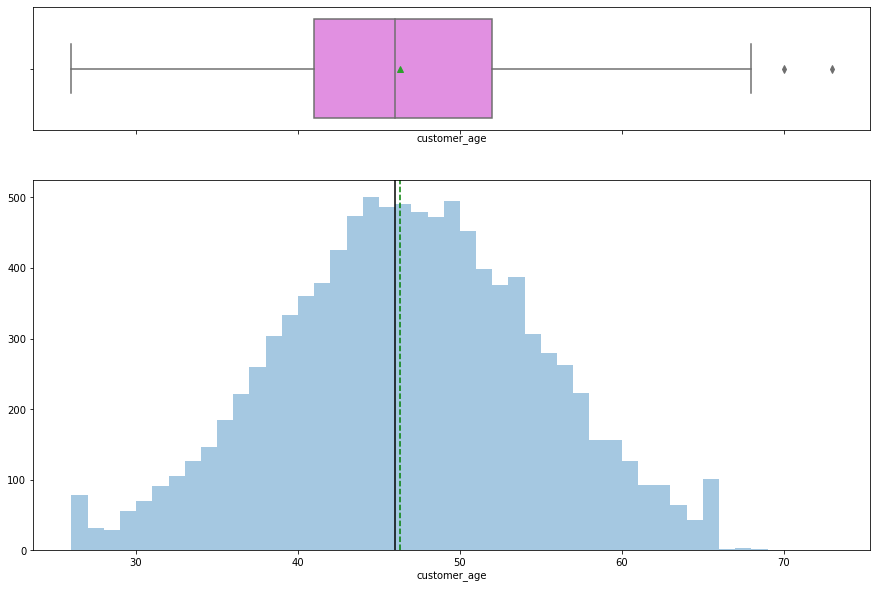

In [151]:
histogram_boxplot(df['customer_age'])

OBSERVATIONS:

* There is a normal distribution with the average age around 46 years old. There are some slight peaks at the beginning and end of the spread. 

### Observations on dependent_count:

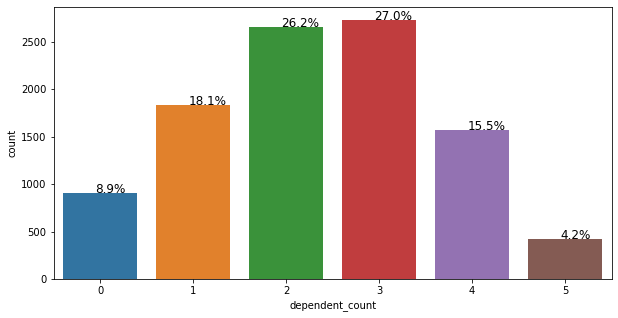

In [152]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['dependent_count'])
plt.xlabel('dependent_count')
plt.ylabel('count')
bar_perc(ax,df['dependent_count']) 

OBSERVATIONS:

* There is only a slight difference in the dependent count with regard to 3 or 2 dependents (27 and 26.2 percent respectively). These are followed by 1 dependent at 18.1 percent. This shows that most of the clients do have children.  

### Observations on months_on_books:

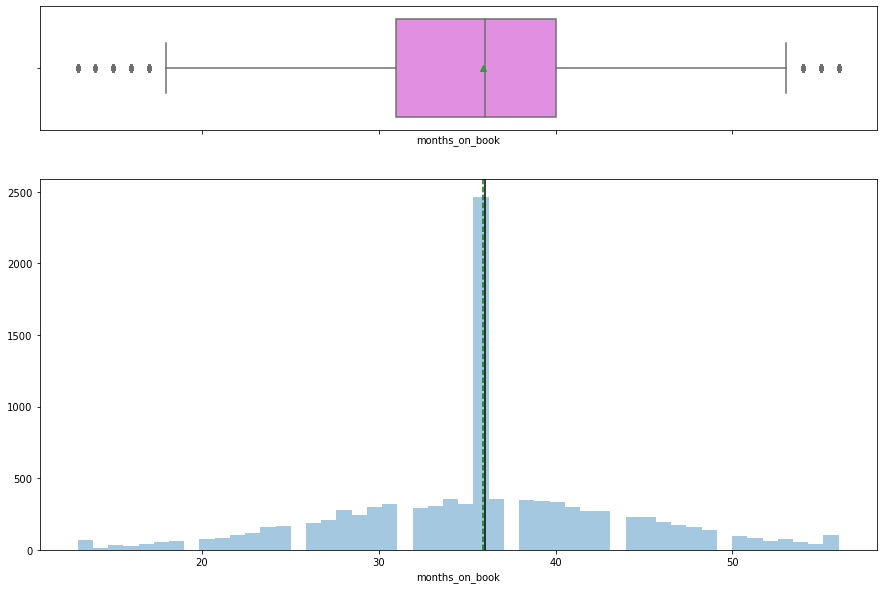

In [153]:
histogram_boxplot(df['months_on_book'])

OBSERVATIONS: 

* This distribution is odd in that such a sharp peak where the median and mean are yet the remaining distribution is fairly evenly distributed. More analysis could help determine why. 

### Observations on total_relationship_count:

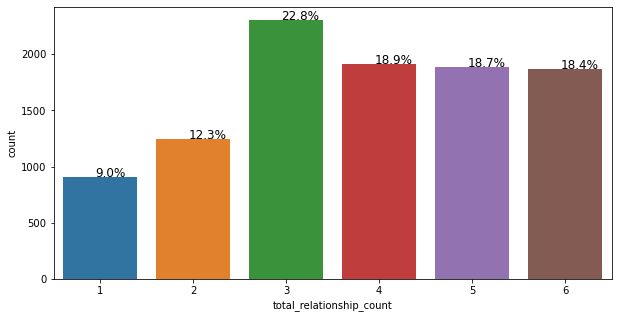

In [154]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['total_relationship_count'])
plt.xlabel('total_relationship_count')
plt.ylabel('count')
bar_perc(ax,df['total_relationship_count']) 

OBSERVATIONS:

* The majority of the clients have 3 or more products with Thera bank.

### Observations on months_inactive_12_mon:

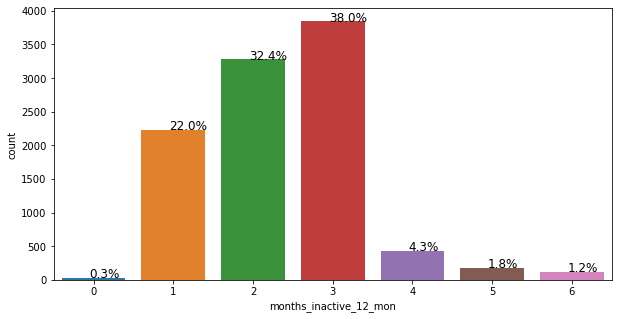

In [155]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['months_inactive_12_mon'])
plt.xlabel('months_inactive_12_mon')
plt.ylabel('count')
bar_perc(ax,df['months_inactive_12_mon']) 

OBSERVATIONS:

* For those client's who are inactive, the majority have been so for 3 months. Otherwise, the highest time of inactivity is either 2 or 1 months.

### Observations on contacts_count_12_mon:

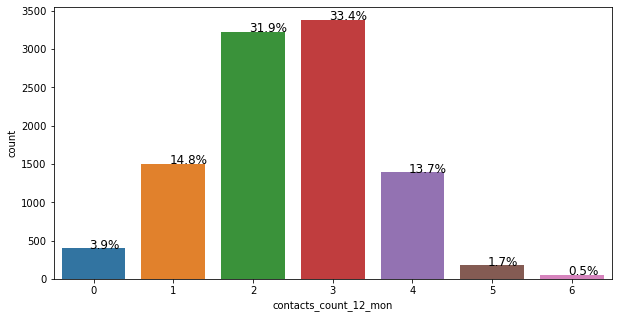

In [156]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['contacts_count_12_mon'])
plt.xlabel('contacts_count_12_mon')
plt.ylabel('count')
bar_perc(ax,df['contacts_count_12_mon']) 

OBSERVATIONS:

* The highest number of contacts was 3 contacts at 33 percent. This is closely followed by 2 contacts at 32 percent.

### Observations on credit_limit:

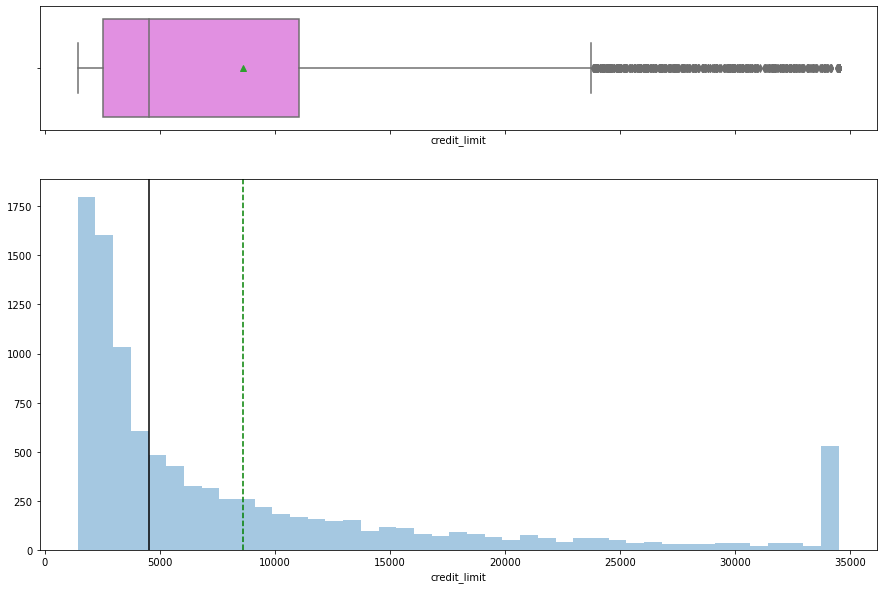

In [157]:
histogram_boxplot(df['credit_limit'])

OBSERVATIONS:

* The mean is 8,361 dollars while the median is 4,549 dollars. This mirrors what the visualization shows us above, skewed data. 

### Observations on total_revolving_bal:

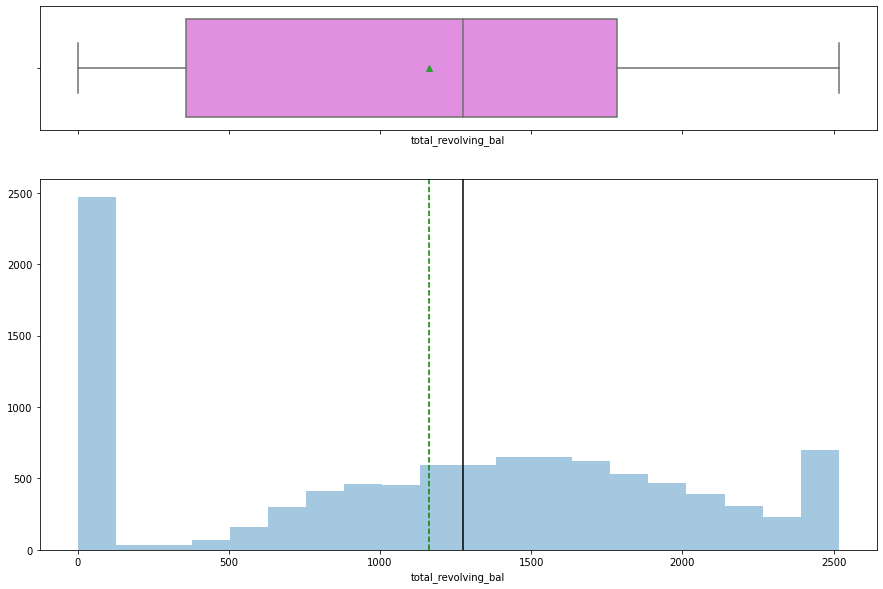

In [158]:
histogram_boxplot(df['total_revolving_bal'])

OBSERVATIONS:

* The mean is 1,162 and the median is 1,276 showing a skew in the data. There are also a significant proportion of clients with a zero revolving balance.   

### Observations on avg_open_to_buy:

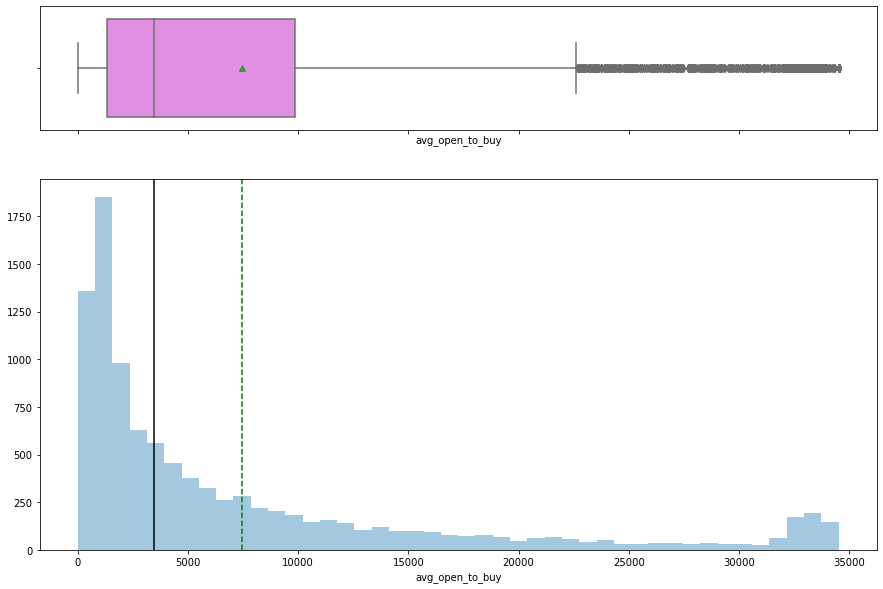

In [159]:
histogram_boxplot(df['avg_open_to_buy'])

OBSERVATIONS:

* The mean is 7,469 dollars and the median is 3,474 dollars suggesting skewed data. 

### Observations on total_trans_amt:

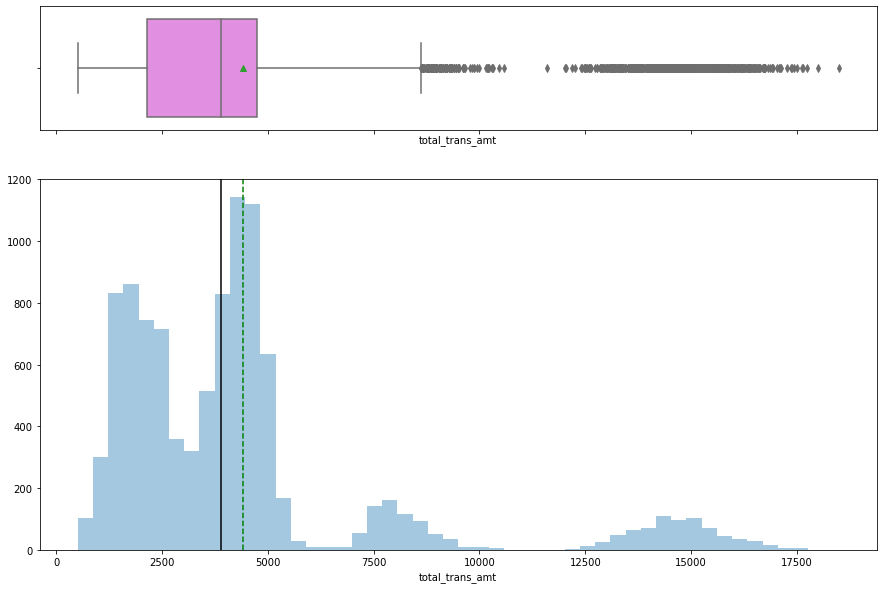

In [160]:
histogram_boxplot(df['total_trans_amt'])

OBSERVATIONS:

* The mean is 4,404 dollars and the median is 3,899 dollars. The data appears skewed and also has outlier areas where there is a chunk of clients within these areas who have an almost "normal distribution" within those areas. More to explore when we get to bivariate testing. 

### Observations on total_trans_ct:

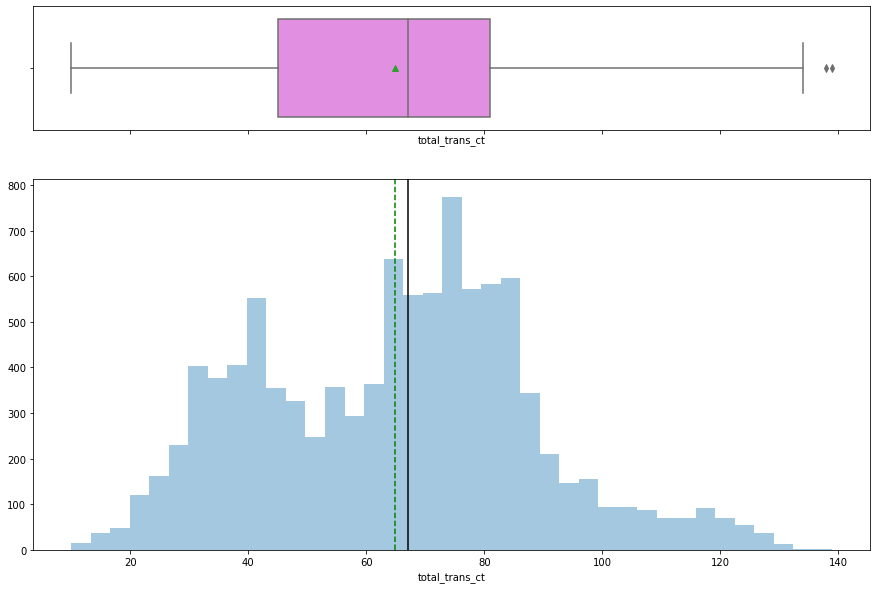

In [161]:
histogram_boxplot(df['total_trans_ct'])

OBSERVATIONS:

* The mean is 65 total transactions and 67 transanctions is the median. The data shows a normal distribution.

### Observations on total_ct_chng_q4_q1:

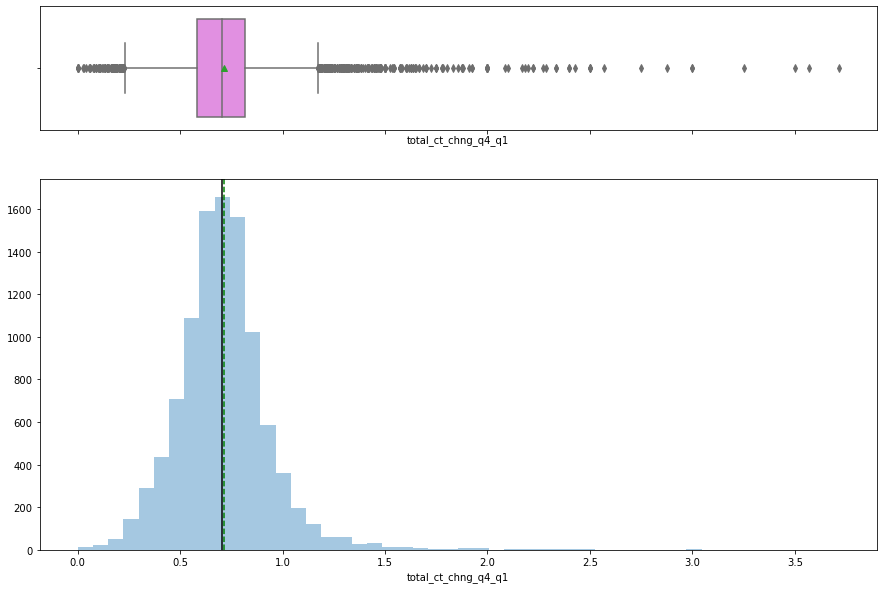

In [162]:
histogram_boxplot(df['total_ct_chng_q4_q1'])

OBSERVATIONS:

* The mean is .71 for total count change and the median is .70. The data is showing some outliers but otherwise has a normal distribution. 

### Observations on total_amt_chng_q4_q1:

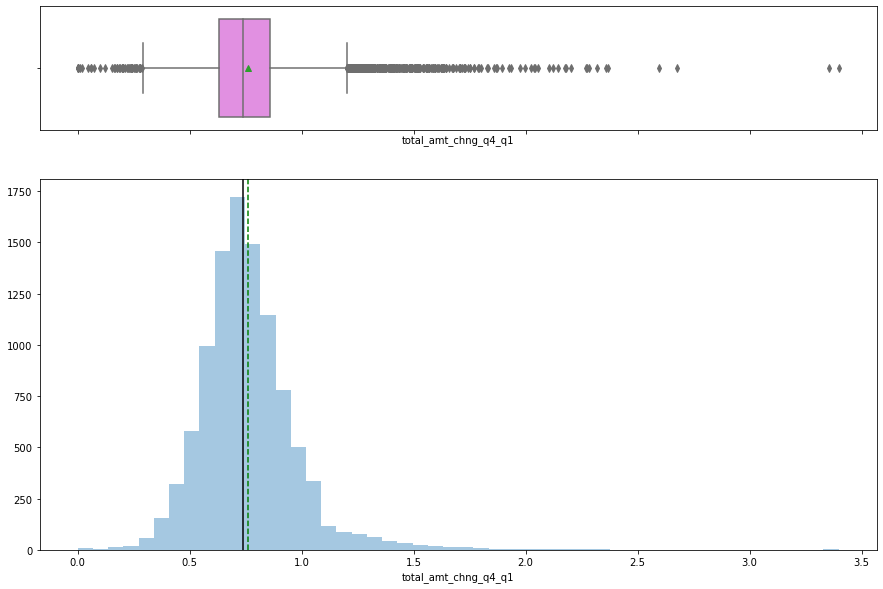

In [163]:
histogram_boxplot(df['total_amt_chng_q4_q1'])

OBSERVATIONS:

* The mean is .76 total amount change and the median is .74. There are outliers on eithr side of what is a normal distribution. 

### Observations on avg_utilization_ratio:

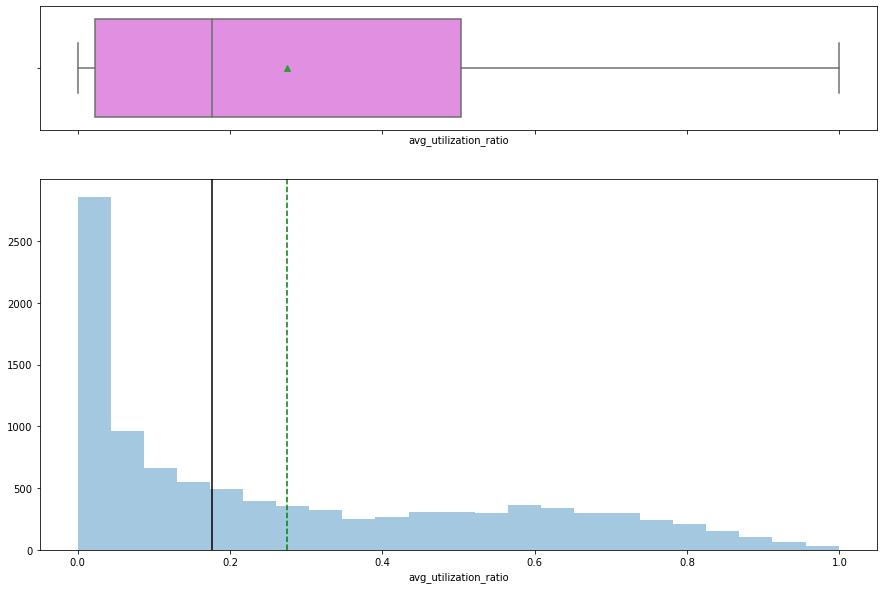

In [164]:
histogram_boxplot(df['avg_utilization_ratio'])

OBSERVATIONS:

* The mean is .27 for the average utilization ratio and the median is .18. The data is skewed and their is a huge spike of data at the low end of the range shown above. Otherwise, the data is pretty spread out and flat.

### Observations on attrition_flag:

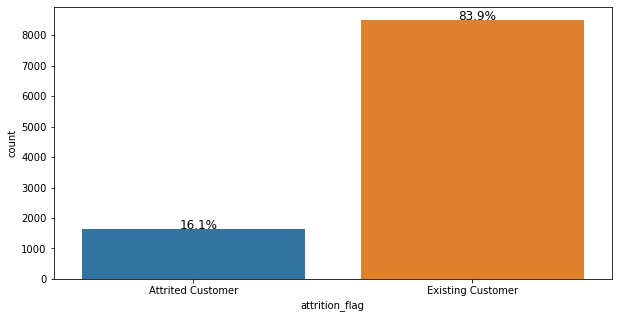

In [165]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['attrition_flag'])
plt.xlabel('attrition_flag')
plt.ylabel('count')
bar_perc(ax,df['attrition_flag']) 

OBSERVATIONS:

* 84 percent of the customers are existing customers. This is good for the Thera bank company that so many clients are still a part of their client base. This is quite unbalanced numbers though so we will need to consider than when we start our modeling. 

### Observations on gender:

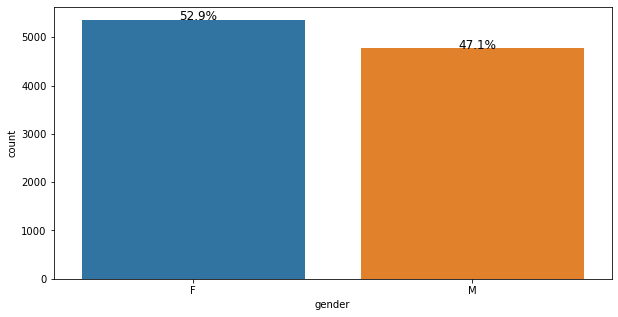

In [166]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['gender'])
plt.xlabel('gender')
plt.ylabel('count')
bar_perc(ax,df['gender']) 

OBSERVATIONS:

* 53 percent of the clients are female while 47 percent are male. That's fairly close percentages.

### Observations on education_level:

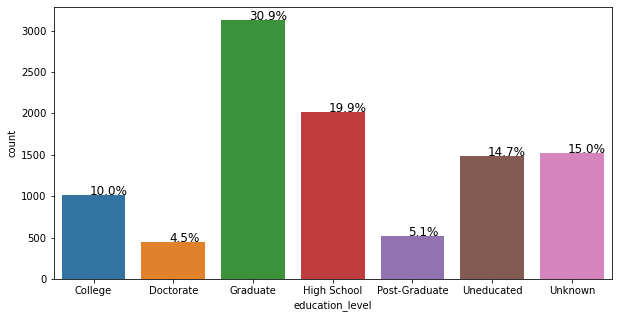

In [167]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['education_level'])
plt.xlabel('education_level')
plt.ylabel('count')
bar_perc(ax,df['education_level']) 

The highest percent of clients have a graduate degree with 31 percent. This is followed by high school education with 20 percent.  

### Observations on marital_status: 

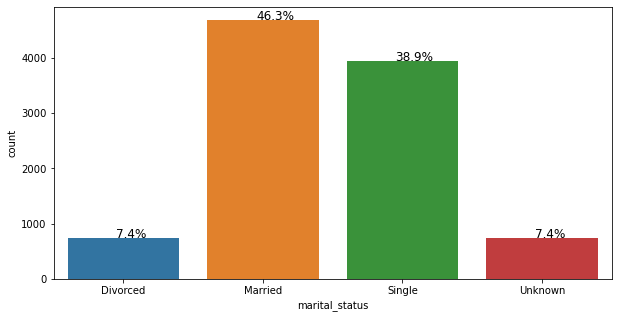

In [168]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['marital_status'])
plt.xlabel('marital_status')
plt.ylabel('count')
bar_perc(ax,df['marital_status']) 

OBSERVATIONS:

* The highest percentage of clients are marries at 46 percent, followed by single clients at 39 percent. 

### Observations on income_category:

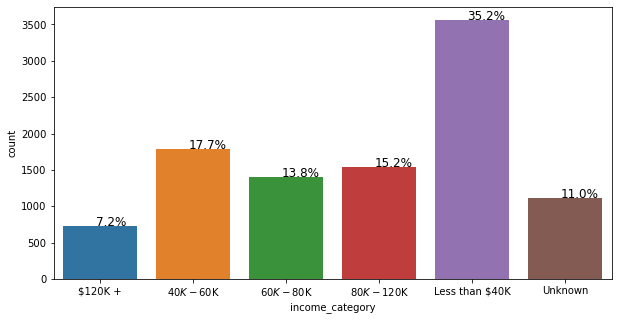

In [169]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['income_category'])
plt.xlabel('income_category')
plt.ylabel('count')
bar_perc(ax,df['income_category']) 

OBSERVATIONS:

* Those clients who make less than 40k make up 35 percent of the client base. This is followed by those who make 40 to 60K with 18 percent. Those who make between 60 to 120K comprise 29 percent of the client base and may explain some of our outlier situations in other columns. 

### Observations on card_category:

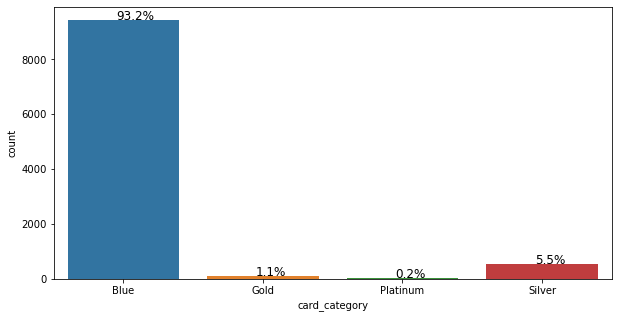

In [170]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['card_category'])
plt.xlabel('card_category')
plt.ylabel('count')
bar_perc(ax,df['card_category']) 

OBSERVATIONS:

* 93 percent of clients have a blue card. The graph visually shows the imbalance in the data. It would be helpful to have a thorough breakdown of the cards, if there are income brackets that are offered a specific card, or does everyone start with a blue card and then have to "earn" the additional card levels.

### Correlation using heatmap:

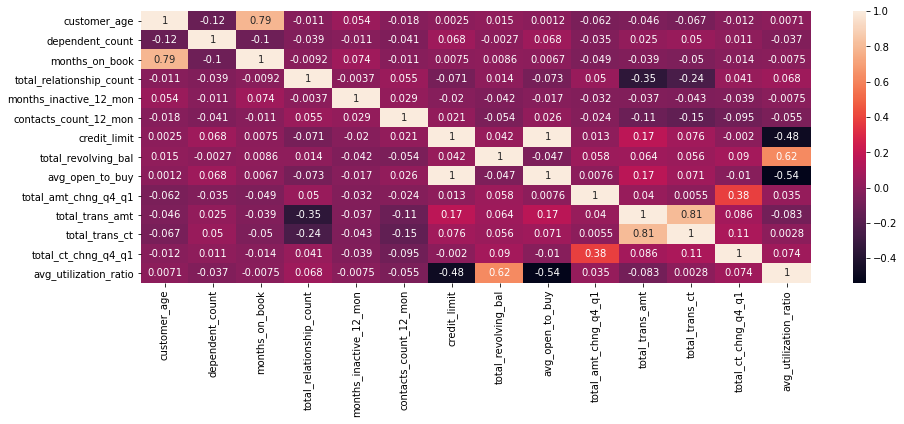

In [171]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

OBSERVATIONS:

* There are some columns that show some correlation:

* Customer age and months on the books has 79 percent
* Total revolving balance and average utilization ratio have 62 percent
* Total transaction amount and total transaction count have 81 percent
* Average open to buy and credit limit have 100 percent

* I don't think there are any surprises with regard to this list of columns that show a high (above 75 percent) correlation. 
* There are columns with negative correlation numbers. However, none are close enough to -1 to warrent noting. 

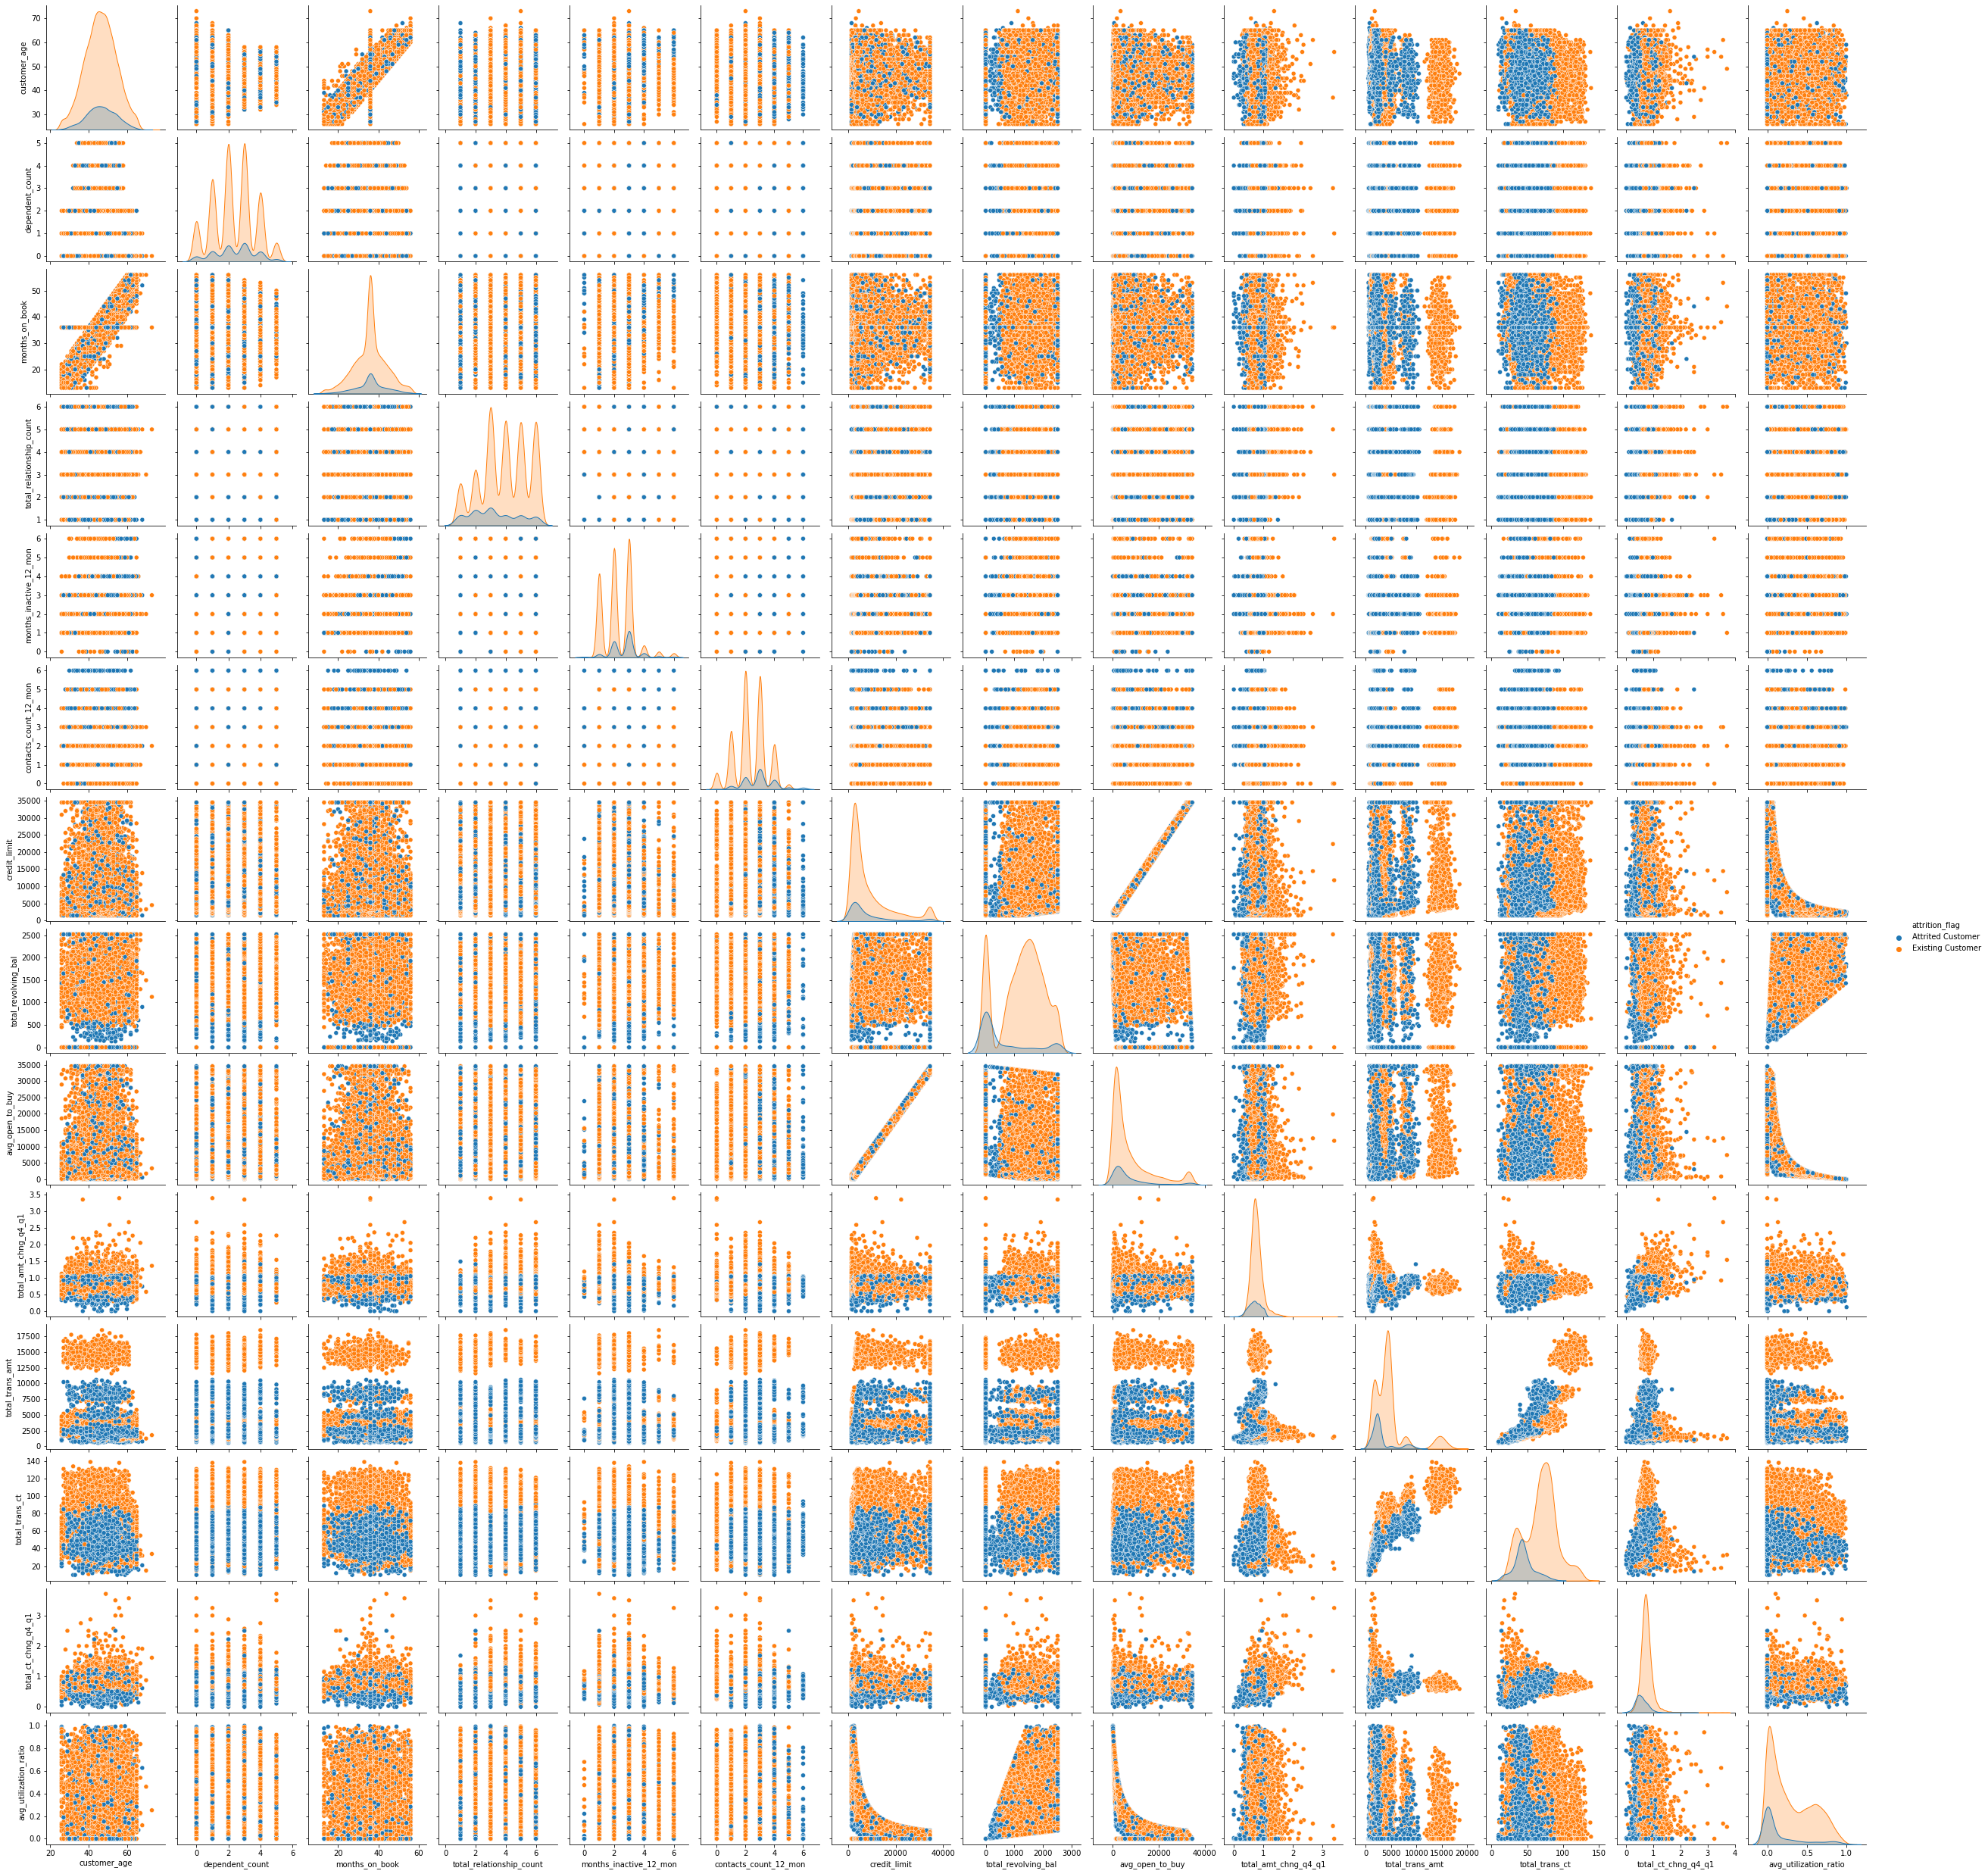

In [172]:
sns.pairplot(data=df,hue='attrition_flag')

OBSERVATIONS:

* There isn't really anything here that we did not already seen in the correlation map.

## Bivariate analysis:

### Observations with attrition_flag and customer_age:

<AxesSubplot:xlabel='attrition_flag', ylabel='customer_age'>

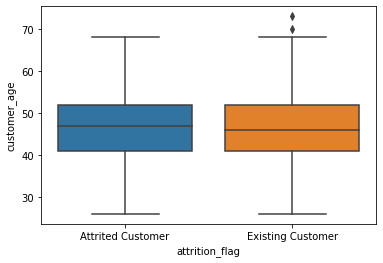

In [173]:
sns.boxplot(df['attrition_flag'], df['customer_age'])

* There is not much difference with regard to age between attrited customers and existing customers. There are some outliers in the higher age range for existing customers.

### Observations with attrition_flag and gender:

<AxesSubplot:xlabel='gender', ylabel='count'>

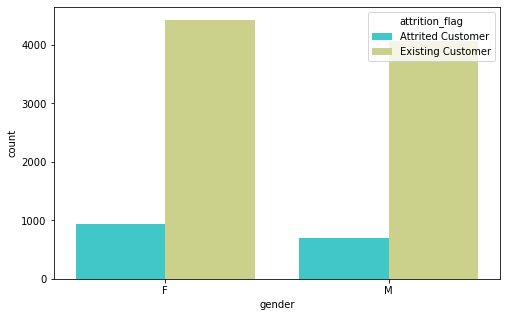

In [174]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',data=df, palette='rainbow',hue=df['attrition_flag'])

* There are more females that fall under the attrited and existing customer categories than males. 

### Observations with attrition_flag and dependent_count:

<AxesSubplot:xlabel='attrition_flag', ylabel='dependent_count'>

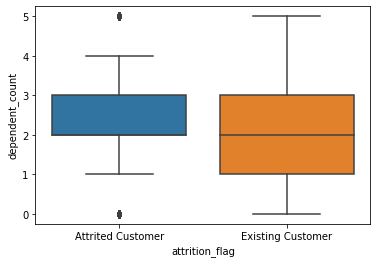

In [175]:
sns.boxplot(df['attrition_flag'], df['dependent_count'])

* Existing customers contains a wider range of dependents than attrited customers. However, there are some outliers in the attrited customers column. 

### Observations with attrition_flag and education_level:

<AxesSubplot:xlabel='education_level', ylabel='count'>

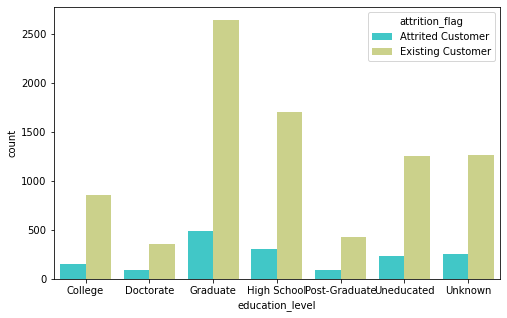

In [176]:
plt.figure(figsize=(8,5))
sns.countplot(x='education_level',data=df, palette='rainbow',hue=df['attrition_flag'])

* Existing customers have the highest count under all levels of education. The most being under the graduate level. We might need to address the unknown portion of the customers. If we can uncover their education level then we could gain a greater depth of data to create our model.  

### Observations with attrition_flag and marital_status:

<AxesSubplot:xlabel='marital_status', ylabel='count'>

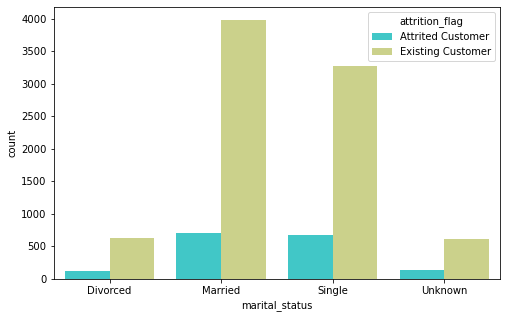

In [177]:
plt.figure(figsize=(8,5))
sns.countplot(x='marital_status',data=df, palette='rainbow',hue=df['attrition_flag'])

 * Existing customers make up the greatest proportion of all four of the marital status' responses. The vast majority are married or single. We might try to dive deeper into the unknown column later in to see if we can uncover their marital status to add ot the depth of our data.

### Observations with attrition_flag and income_category:

<AxesSubplot:xlabel='income_category', ylabel='count'>

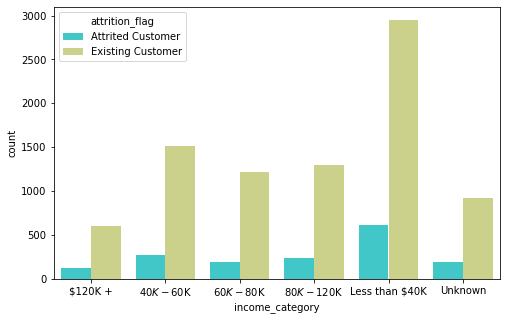

In [178]:
plt.figure(figsize=(8,5))
sns.countplot(x='income_category',data=df, palette='rainbow',hue=df['attrition_flag'])

* Existing customers makes up the highest group within all of the income brackets. Most of them are found in the less than 40K bracket followed by 40 to 60K. The attrited customers have more in the less than 40K brackete than any other also. 

### Observations with attrition_flag and card_category:

<AxesSubplot:xlabel='card_category', ylabel='count'>

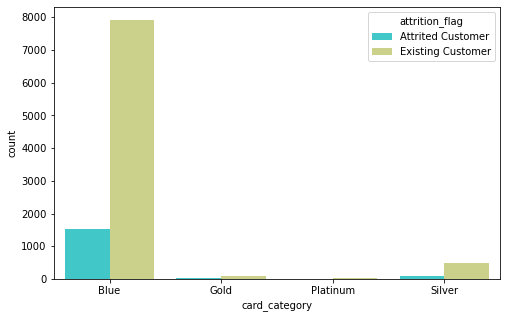

In [179]:
plt.figure(figsize=(8,5))
sns.countplot(x='card_category',data=df, palette='rainbow',hue=df['attrition_flag'])

* The Blue card contains more of both attrited and existing customers than any other card. 

### Observations with attrition_flag and months_on_book:

<AxesSubplot:xlabel='attrition_flag', ylabel='months_on_book'>

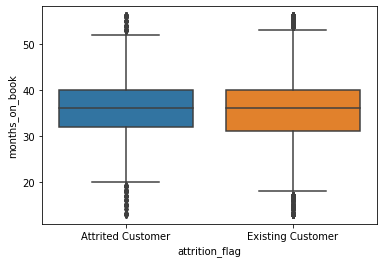

In [180]:
sns.boxplot(df['attrition_flag'], df['months_on_book'])

* The bulk of the customers are within 30 to 40 months on the books. Both attrited and existing customers have outliers on both sides of the distribution.

### Observations with attrition_flag and total_relationship_count:

<AxesSubplot:xlabel='attrition_flag', ylabel='total_relationship_count'>

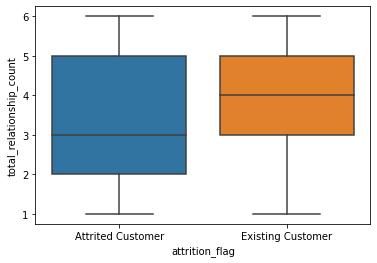

In [181]:
sns.boxplot(df['attrition_flag'], df['total_relationship_count'])

* The greatest depth of customers falls under the attrited customers as the bulk of their products was from 2 to 5 products. The existing customers have the bulk of their customers with 3 to 5 products.

### Observations with attrition_flag and months_inactive_12_mon:

<AxesSubplot:xlabel='attrition_flag', ylabel='months_inactive_12_mon'>

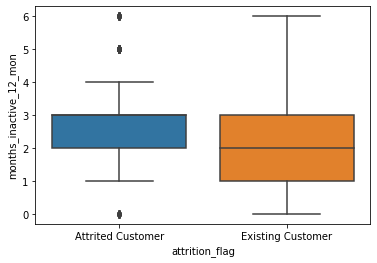

In [182]:
sns.boxplot(df['attrition_flag'], df['months_inactive_12_mon'])

* There are outliers within the attrited customer bracket and they actually had fewer months overall they were inactive than the existing customers. There are existing customers who have been inactive zero months and up to 6 months. the bulk of the existing customers are inactive on average from 1 to 3 months.

### Observations with attrition_flag and contacts_count_12_mon:

<AxesSubplot:xlabel='attrition_flag', ylabel='contacts_count_12_mon'>

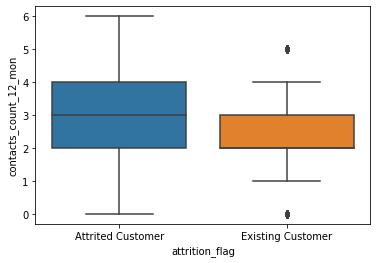

In [183]:
sns.boxplot(df['attrition_flag'], df['contacts_count_12_mon'])

* Although the attrited customers have a greater depth of contacts (from 0 to 6 times in 12 months), the bulk of their bracket have 2 to 4 contacts. Existing customers have the bulk of their bracket with 2 to 3 contacts within a 12 month period. However, they do seem to have some outliers present on either end of the column.

### Observations with attrition_flag and credit_limit:

<AxesSubplot:xlabel='attrition_flag', ylabel='credit_limit'>

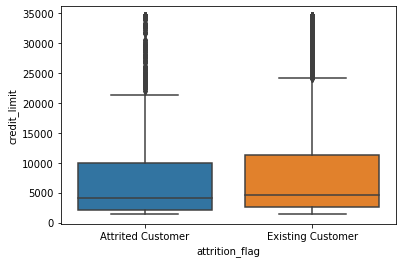

In [184]:
sns.boxplot(df['attrition_flag'], df['credit_limit'])

* Both attrited and existing cutomers have the bulk of their groups that fall within a 2,500 to 10,000 dollar credit limit. There are some attrited and exisiting customers who have a limit as high as 35,000 dollars (albeit they are outliers).

### Observations with attrition_flag and total_revolving_bal:

<AxesSubplot:xlabel='attrition_flag', ylabel='total_revolving_bal'>

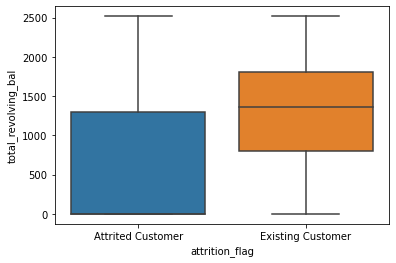

In [185]:
sns.boxplot(df['attrition_flag'], df['total_revolving_bal'])

* Attrited customers have from 0 to 1,300ish dollars while existing customers have from 800ish to 1,700ish dollars in total revolving balance. 

### Observations with attrition_flag and avg_open_to_buy:

<AxesSubplot:xlabel='attrition_flag', ylabel='avg_open_to_buy'>

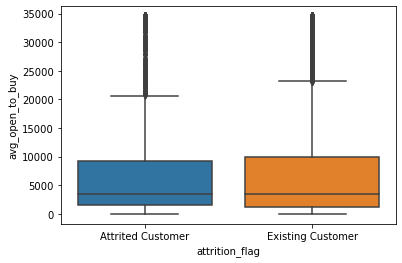

In [186]:
sns.boxplot(df['attrition_flag'], df['avg_open_to_buy'])

* The bulk of both attrited and existing customers have from around 1,000 to 10,000 dollars on average in open to buy. There are outliers for both brackets starting from 20,000 to 35,000 dollars.

### Observations with attrition_flag and total_trans_amt:

<AxesSubplot:xlabel='attrition_flag', ylabel='total_trans_amt'>

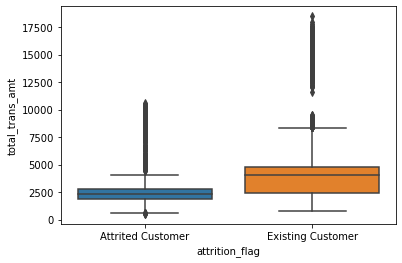

In [187]:
sns.boxplot(df['attrition_flag'], df['total_trans_amt'])

* Attrited customers have a smaller depth of total transaction amounts (from approximately 2 to 3 thousand dollars) with a large proportion of outliers on the high end of the spectrum. Existing customers have a wider depth of total transaction amounts from 2,500 to close to 5,000 dollars. They also have outliers on the higher end from around 8 to 18,000 dollars.

### Observations with attrition_flag and total_trans_ct:

<AxesSubplot:xlabel='attrition_flag', ylabel='total_trans_ct'>

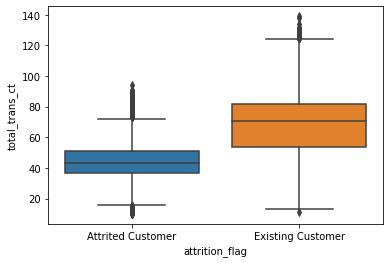

In [188]:
sns.boxplot(df['attrition_flag'], df['total_trans_ct'])

* Attrited customers overall have a lower total transcation count; the bulk of which fall between 35 to 50. They also have outliers on either side of the spectrum. Existing customers have a wider range but the bulk of them fall between 50 to 80 transactions. they also have outliers on either side of the spectrum but the majority of them are on the higher end.

### Observations with attrition_flag and total_ct_chng_q4_q1:

<AxesSubplot:xlabel='attrition_flag', ylabel='total_ct_chng_q4_q1'>

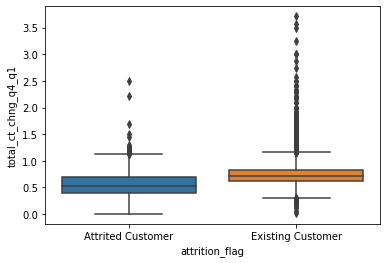

In [189]:
sns.boxplot(df['attrition_flag'], df['total_ct_chng_q4_q1'])

* The bulk of the total count change is lower in attrited customers than existing customers. Existing customers have outliers on both sides of the data distribution. As well, the bulk of the existing customers total change is in a higher bracket.

### Observations with attrition_flag and total_amt_chng_q4_q1:

<AxesSubplot:xlabel='attrition_flag', ylabel='total_amt_chng_q4_q1'>

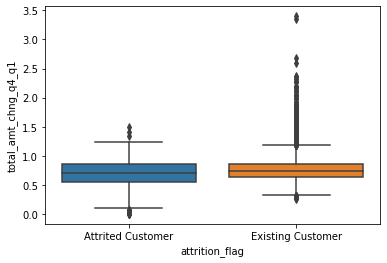

In [190]:
sns.boxplot(df['attrition_flag'], df['total_amt_chng_q4_q1'])

* Existing customers have a greater spread of total amount change and at a higher minimum value. There are also many outliers within this bracket. Attrited customers over all have a smaller spread of total amount change but still has outliers. 

### Observations with attrition_flag and avg_utilization_ratio:

<AxesSubplot:xlabel='attrition_flag', ylabel='avg_utilization_ratio'>

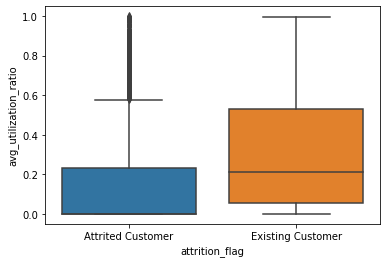

In [191]:
sns.boxplot(df['attrition_flag'], df['avg_utilization_ratio'])

* Existing customers are spending more of their available credit overall. Attrited customers are not spending as much overall but do have outliers on the high end who are spending more of their available credit. 

### Observations with customer_age and months_on_book:

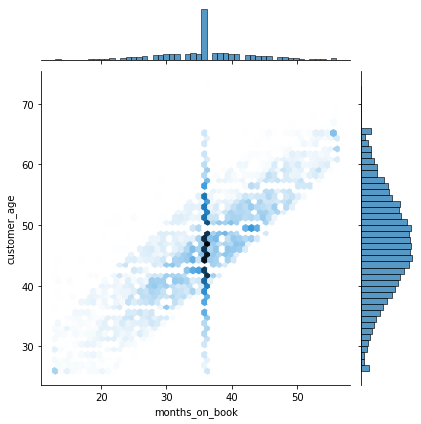

In [192]:
sns.jointplot(df['months_on_book'], df['customer_age'], kind = "hex")
plt.show()

* A positive relationship does exist between these columns. This also shows the large peak of data around the 36 months on book. I'm not sure if that is reflective of a huge account opening push at this time. 

### Observations on total_trans_ct and total_trans_amt:

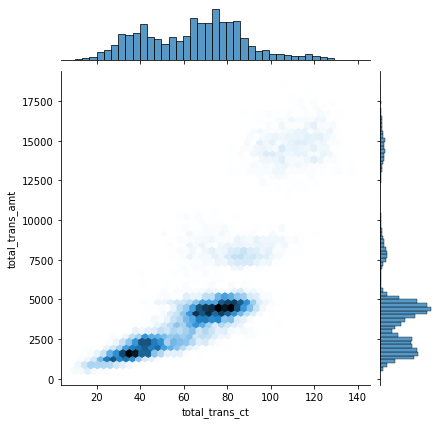

In [193]:
sns.jointplot(df['total_trans_ct'], df['total_trans_amt'], kind = "hex")
plt.show()

* Positive relationship between total transaction count and total transaction amount. There are some outliers in the higher ranges.

# Data Preprocessing:

### Outlier detection:

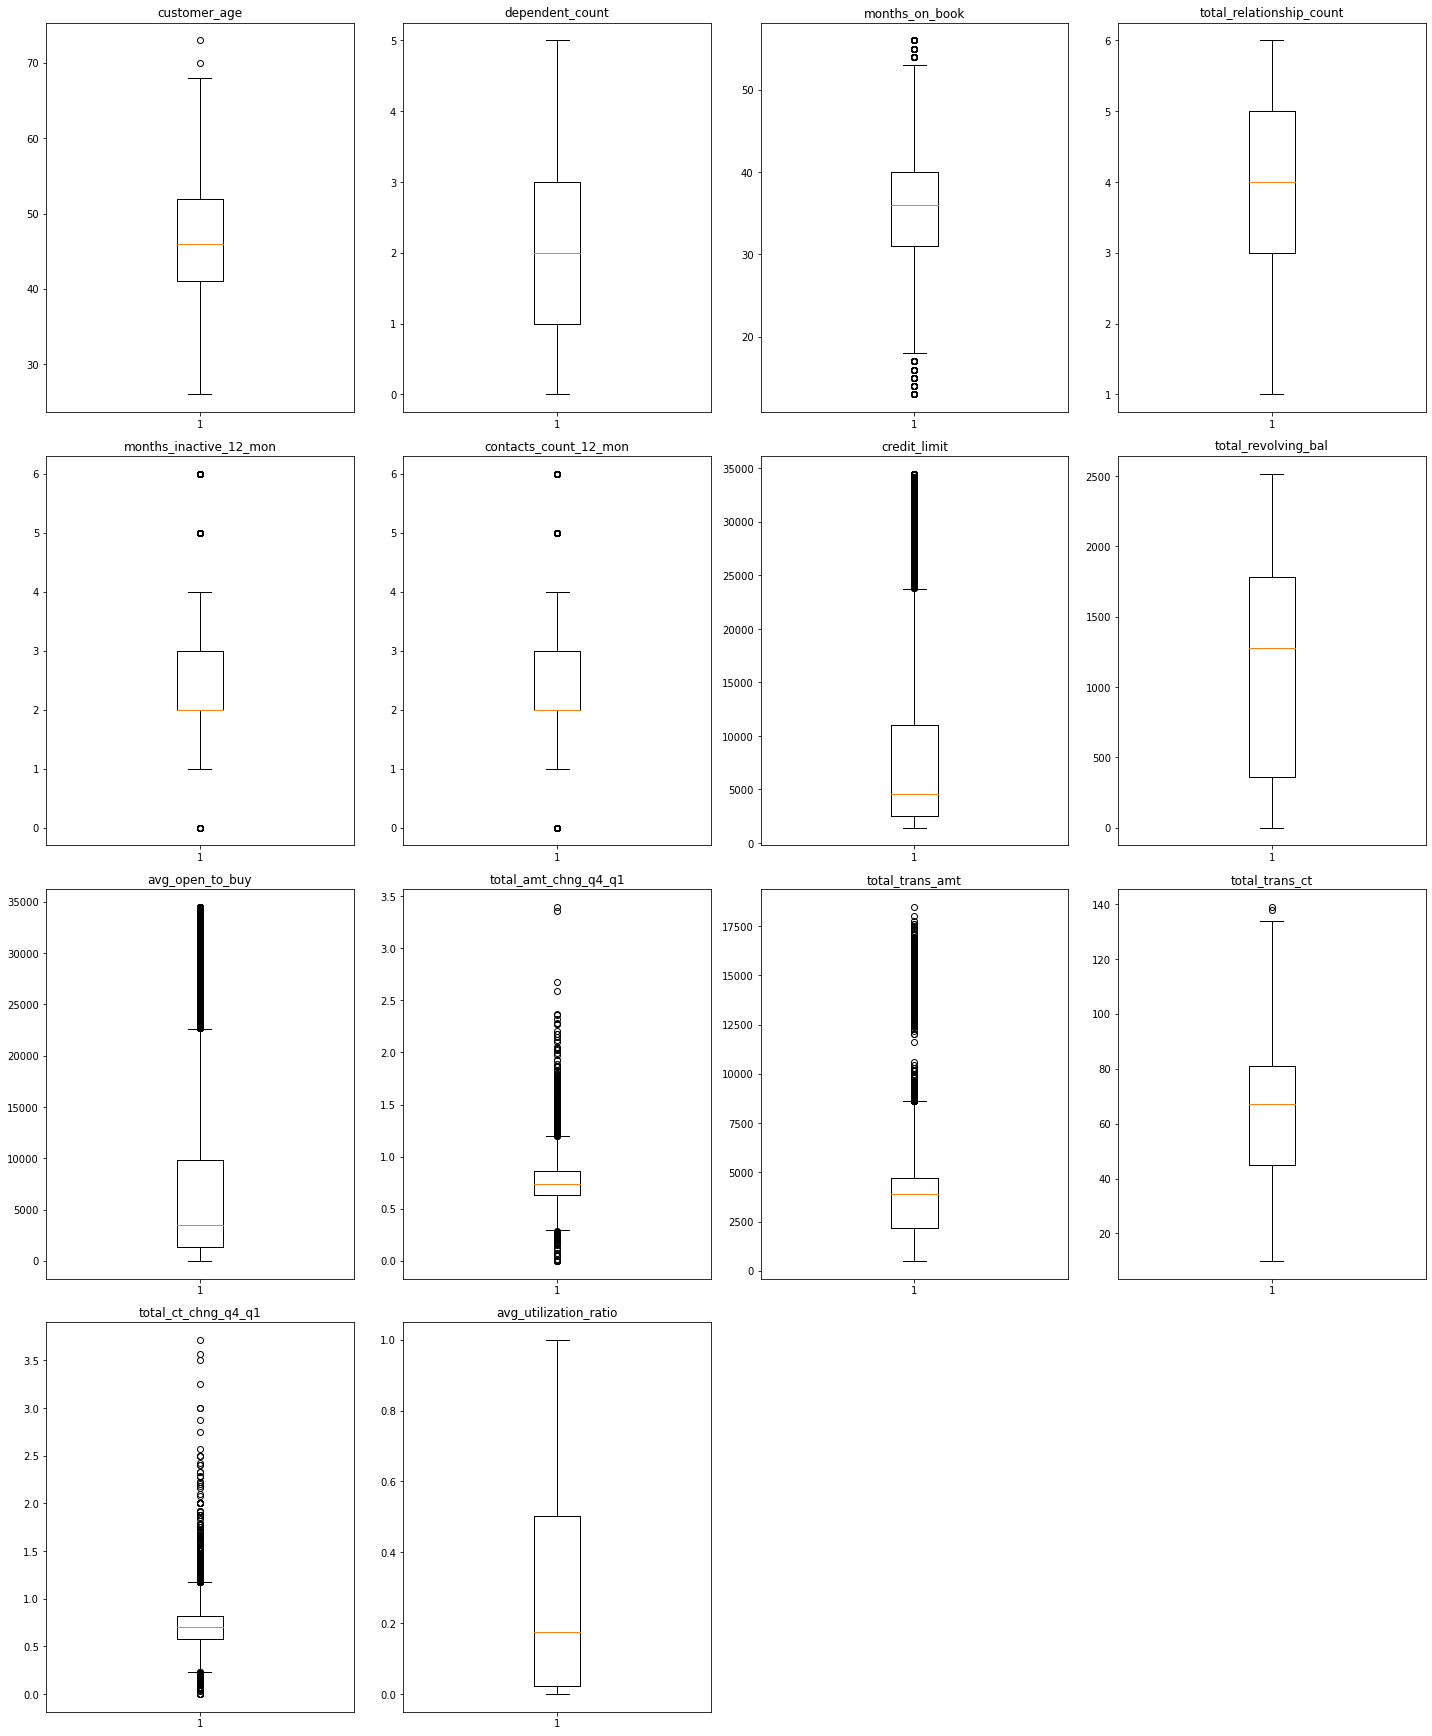

In [194]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* There are many columns with outliers but I am choosing to not clip or adjust these columns. I think this is all valid and useful data that should be preserved as is unless we see cause to adjust it later on. 

# Model Building:

### Split data:

In [195]:
X = df.drop(['attrition_flag'],axis=1) # attrition_flag from our X variable since it will be used for our y variable
y = df['attrition_flag'].apply(lambda x : 1 if x=='Existing Customer' else 0)

In [196]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [197]:
y.value_counts()

1    8500
0    1627
Name: attrition_flag, dtype: int64

### Encoding categorical variables:

In [198]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 32) (3039, 32)


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

### Build the model:

In [200]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [201]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic regression:

In [202]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

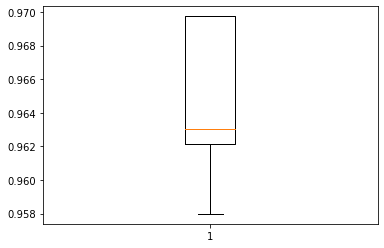

In [203]:
scoring='recall' # Check score by using Kfold and cross_val_score
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Variance is between .958 and .965.

Accuracy on training set :  0.8896726862302483
Accuracy on test set :  0.8881210924646266
Recall on training set :  0.9641956631366616
Recall on test set :  0.9698157585260682
Precision on training set :  0.9097541633624108
Precision on test set :  0.9039093898428937


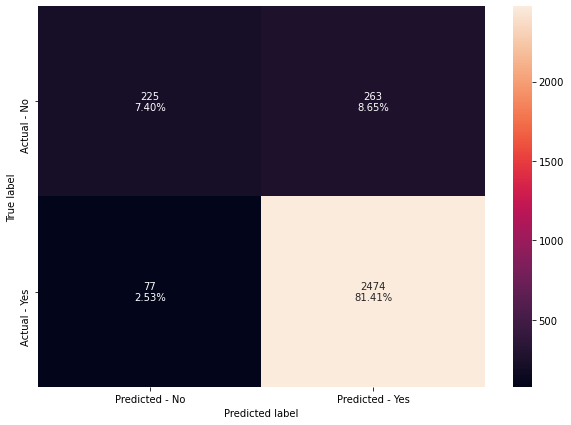

In [204]:
# Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(lr,y_test)

* Model is showing signs of overfitting based on accuracy, recall and precision scores on train and test data.
* We can try using SMOTE for both oversampling and undersampling models and check scoring for those.

### Oversampling using SMOTE:

In [205]:
from imblearn.over_sampling import SMOTE

In [206]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 5949
Before UpSampling, counts of label 'No': 1139 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 32)
After UpSampling, the shape of train_y: (11898,) 



### Logistic regression: oversampled data

In [207]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

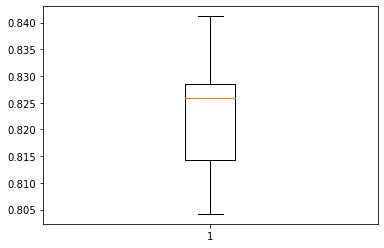

In [208]:
scoring='recall' # Check score by using Kfold and cross_val_score 
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Variance is between .805 and .840

Accuracy on training set :  0.8010590015128594
Accuracy on test set :  0.7910496873971701
Recall on training set :  0.8006387628172802
Recall on test set :  0.8004704037632301
Precision on training set :  0.8013122476446837
Precision on test set :  0.9418819188191881


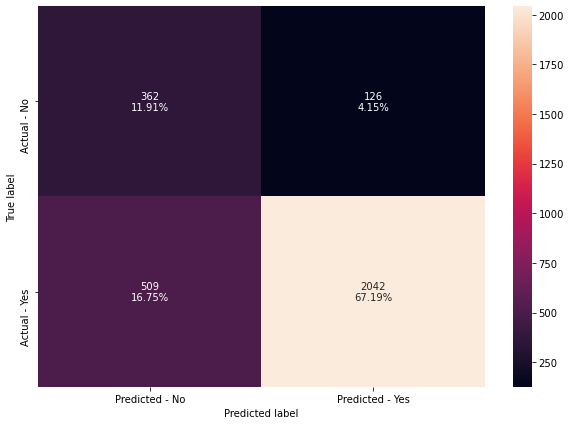

In [209]:
# Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# Creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* The scores are still showing signs of overfit and the recall scores have decreased as well. Now to try regularization and undersampling model.

### Regularization:

In [210]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7043200537905531
Accuracy on test set :  0.8068443566962816
Recall on training set :  0.8524121701126239
Recall on test set :  0.8573108584868679
Precision on training set :  0.6576319543509273
Precision on test set :  0.9074688796680498


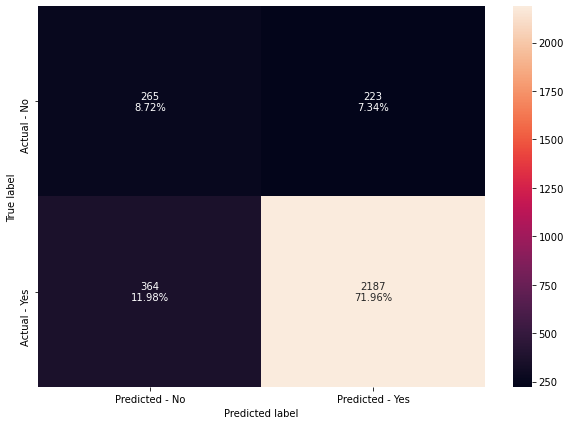

In [211]:
# Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# Creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* After regularization, there is some improvement in the model. However, we are still not seeing the scores we would prefer with regard to recall.

### Undersampling using SMOTE:

In [212]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [213]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5949
Before Under Sampling, counts of label 'No': 1139 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 32)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic regression: undersampled data

In [214]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

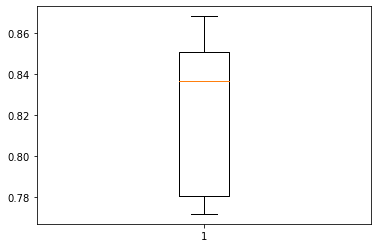

In [215]:
scoring='recall'  # Check score by using Kfold and cross_val_score
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Variance is between .75 and .88

Accuracy on training set :  0.8129938542581212
Accuracy on test set :  0.8015794669299111
Recall on training set :  0.8015803336259877
Recall on test set :  0.8024304194433556
Precision on training set :  0.8203054806828391
Precision on test set :  0.9538676607642125


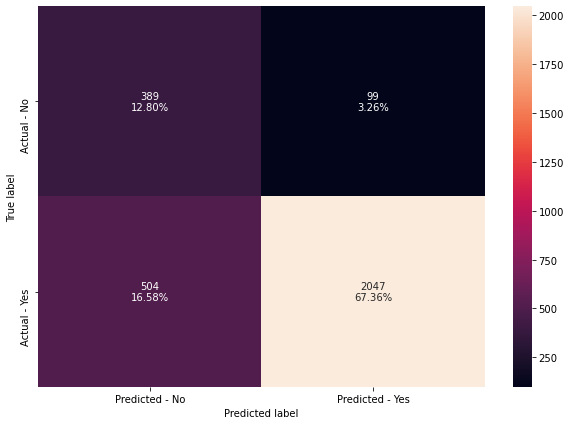

In [216]:
# Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# Creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* This model still is not where we would prefer to be. The FN are higher than the last model. 

In [217]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [218]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [219]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [220]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.889673   
1            Logistic Regression on Oversampled data        0.801059   
2  Logistic Regression-Regularized (Oversampled d...        0.704320   
3           Logistic Regression on Undersampled data        0.812994   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.888121      0.964196     0.969816         0.909754        0.903909  
1       0.791050      0.800639     0.800470         0.801312        0.941882  
2       0.806844      0.852412     0.857311         0.657632        0.907469  
3       0.801579      0.801580     0.802430         0.820305        0.953868

* Of the four different versions of Logistic regression models created, the original model has the best recall scores. I do still think we see signs of overfitting. Let's try other methods to create models ie Decision Tree, Random Forest, etc.

### Decision Tree model:

In [221]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [222]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [223]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

Accuracy on training set :  1.0
Accuracy on test set :  0.9312273774267851
Recall on training set :  1.0
Recall on test set :  0.9623676989415916
Precision on training set :  1.0
Precision on test set :  0.9559968847352025


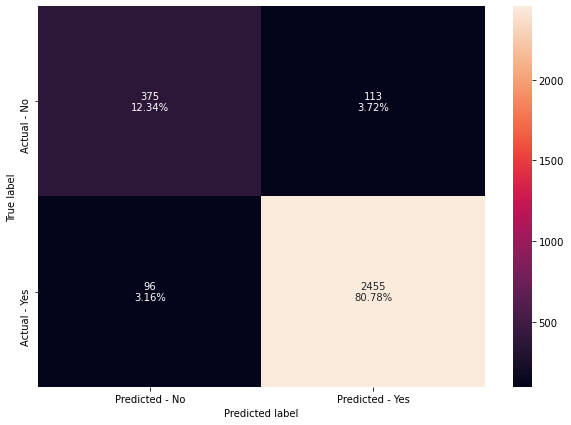

In [224]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

* The scores do suggest overfitting with this model. However, the TP and TN percents are the best we have seen so far.

### Random Forest  model:

In [225]:
# Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9503126028298783
Recall on training set :  1.0
Recall on test set :  0.9874558996471972
Precision on training set :  1.0
Precision on test set :  0.9548900682335102


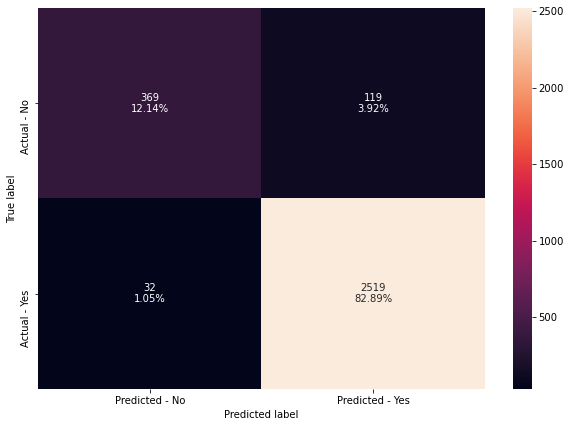

In [226]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

* This model is showing signs of overfitting. The FN percent has decreased from Decision Tree model. 

### Bagging classifier model:

In [227]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

Accuracy on training set :  0.9973194130925508
Accuracy on test set :  0.9473511023362948
Recall on training set :  0.9979828542612204
Recall on test set :  0.9729517836142689
Precision on training set :  0.9988223418573351
Precision on test set :  0.9646327244461718


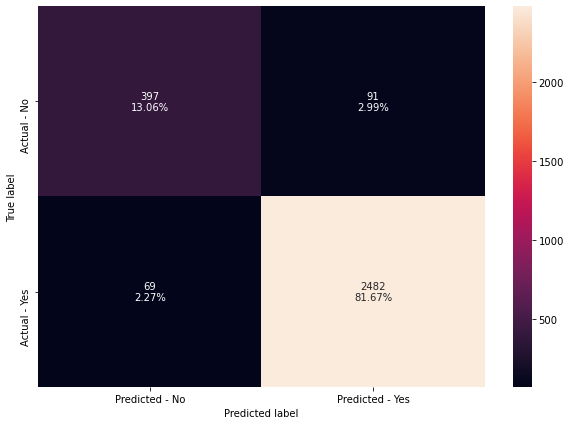

In [228]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

* This model is showing signs of overfitting. The FN have increased from Logistic regression model while the FP have decreased.

### Adaboost model:

Accuracy on training set :  0.9612020316027088
Accuracy on test set :  0.9601842711418229
Recall on training set :  0.9810052109598252
Recall on test set :  0.9811838494707957
Precision on training set :  0.9729909969989997
Precision on test set :  0.9716614906832298


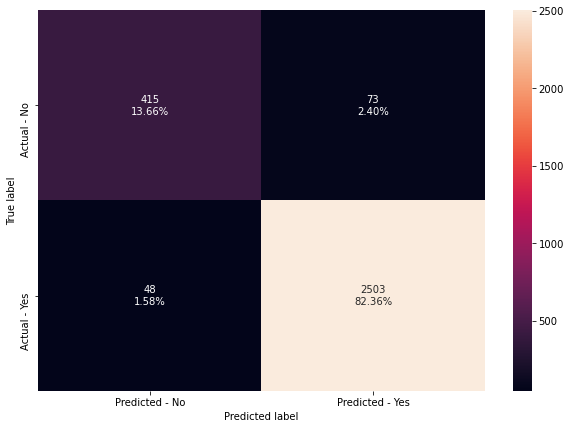

In [229]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

* This model is showing signs of overfitting. The FN and FP are some of the lowest percents we have seen thus far comparitive to other models. 

### Gradient boost model:

Accuracy on training set :  0.9771444695259593
Accuracy on test set :  0.9631457716354064
Recall on training set :  0.9929399899142713
Recall on test set :  0.9882399059192474
Precision on training set :  0.9800895968143355
Precision on test set :  0.9684978870533999


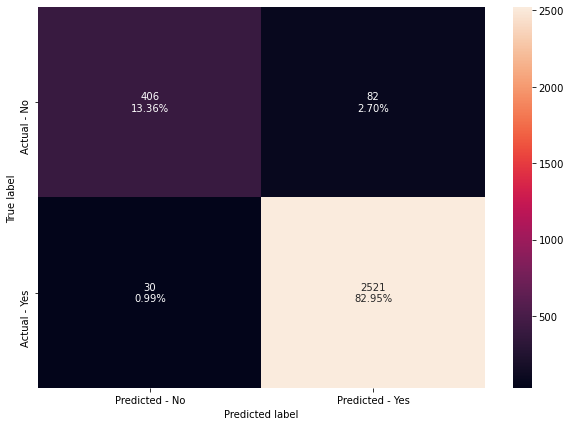

In [230]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

* This model is showing signs of overfitting. The FN and FP are the lowest percentages we have seen so far.

### XGBoost model:

Accuracy on training set :  1.0
Accuracy on test set :  0.9703849950641659
Recall on training set :  1.0
Recall on test set :  0.9886319090552724
Precision on training set :  1.0
Precision on test set :  0.9763840495547813


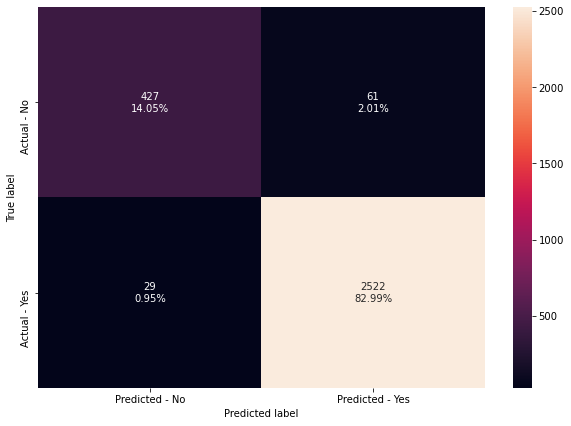

In [231]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

* This model is overfitting. The FN and FP are even better percentages than previously seen in other models.

### Compare models:

In [232]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 96.68843954739171
RF: 98.65525015725382
GBM: 98.89055841007556
ADB: 97.93229251330473
XGB: 98.72244877766076
DTREE: 96.04978408520684


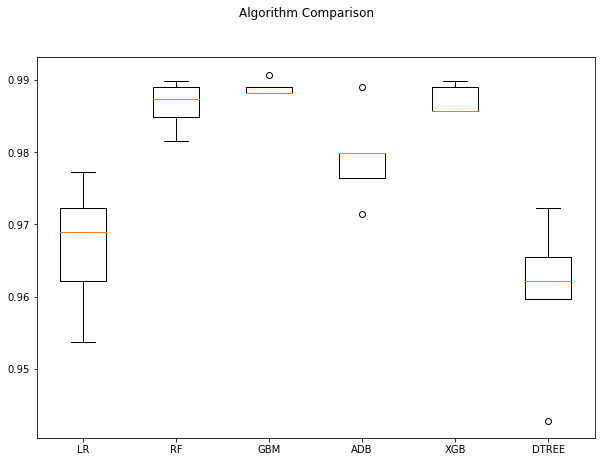

In [233]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

* Of the six models we compared, the 3 with the best cross validation recall are Random Forest, Gradient Boost and XGBoost. Adaboost is coming in close to these other models so if we have any issues with executing the next steps with XGBoost, we can use it instead. 
* These models are being chosen because when we compare the cross validation scores of them, we can see that they are the top performers: Random Forest: 98.7, Gradient Boost: 98.9 and XGBoost: 98.7. This number represents the skill with which the model will perform. 
* Now that we have determined the best 3 models, we can now perform hyperparamter tuning using both Grid Search and Random search. From there we will determine the model that performs the best based on recall.

# Hyperparameter tuning:

## Random Forest:

### Grid search:

In [238]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1)) 


# use a full grid over all parameters
rf_parameters = {
    'randomforestclassifier__n_estimators' : [50, 100, 150],
    'randomforestclassifier__max_features' : ['sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split' : [2, 3, 4]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=rf_parameters, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)
                     
print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
) 

Best Parameters:{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__n_estimators': 150} 
Score: 0.9875609049338827
CPU times: user 2.91 s, sys: 248 ms, total: 3.16 s
Wall time: 2min 26s


In [245]:
# Creating new pipeline with best parameters as determined above
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1,      
        n_estimators = 150,
        min_samples_leaf=1,
        criterion =  'entropy',
        min_samples_split = 4
    ),
)
# Did not include max_features: 'sqrt' as it is the same as 'auto' which is the default

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy',
                                        min_samples_split=4, n_estimators=150,
                                        random_state=1))])

Accuracy on training set :  0.9998589164785553
Accuracy on test set :  0.9493254359986838
Recall on training set :  1.0
Recall on test set :  0.9898079184633477
Precision on training set :  0.9998319327731092
Precision on test set :  0.9517527327553713


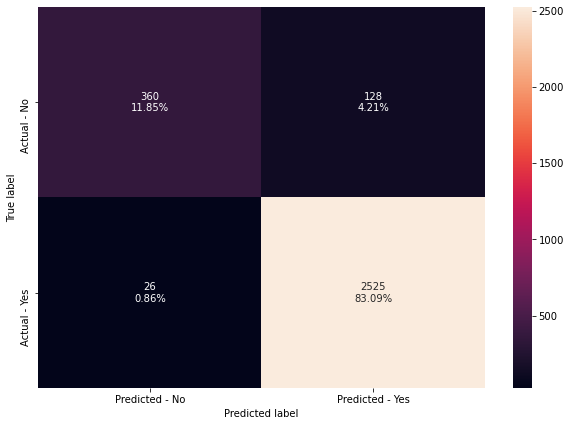

In [246]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

* Grid search time: 2 min 26 seconds
* This model does appear to still be overfitting
* Will try Random search and see if that model performs better

### Random search:

In [248]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    'randomforestclassifier__n_estimators' : [50, 100, 150],
    'randomforestclassifier__max_features' : ['sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split' : [2, 3, 4]}
    
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
rf_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rf_tuned2.best_params_,rf_tuned2.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 150, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__criterion': 'entropy'} with CV score=0.9873929790587388:
CPU times: user 2min 40s, sys: 639 ms, total: 2min 40s
Wall time: 2min 40s


In [249]:
# Creating new pipeline with best parameters as determined above
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1,      
        n_estimators = 150,
        min_samples_leaf=1,
        criterion =  'entropy',
        min_samples_split = 2
    ),
)
# Did not include max_features: 'sqrt' as it is the same as 'auto' which is the default

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=150,
                                        random_state=1))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9512997696610728
Recall on training set :  1.0
Recall on test set :  0.990983927871423
Precision on training set :  1.0
Precision on test set :  0.9528835280814173


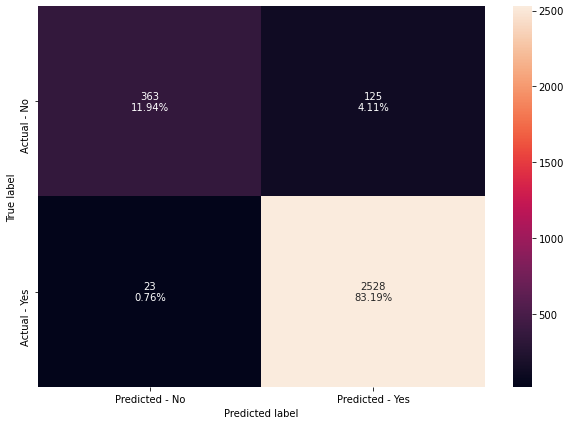

In [250]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

* Random search time: 2 min 40 seconds (longer than the Grid Search version) 
* This model does appear to also be an overfit model...the FN have decreased slightly.

## Gradient Boost:

### Grid search:

In [255]:
%%time 

#Creating pipeline
gb_pipe=make_pipeline(GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1))


#Parameter grid to pass in GridSearchCV
gb_param_grid={'gradientboostingclassifier__n_estimators' : [25, 200, 300],
    'gradientboostingclassifier__max_features' : ['sqrt', 'auto'],
    'gradientboostingclassifier__min_samples_leaf' : [2, 4, 6, 10],
    'gradientboostingclassifier__min_samples_split' : [1, 2, 3, 4, 6, 8, 10]}
                       
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=gb_pipe, param_grid=gb_param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_leaf': 4, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 25} with CV score=0.9902504046193752:
CPU times: user 2.67 s, sys: 566 ms, total: 3.24 s
Wall time: 5min 53s


In [264]:
# Creating new pipeline with best parameters as determined above
gb_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1,      
        n_estimators = 25,
        min_samples_leaf=4,
        min_samples_split = 2
    ),
)


# Did not include max_features: 'sqrt' as it is the same as 'auto' which is the default

# Fit the model on training data
gb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(min_samples_leaf=4, n_estimators=25,
                                            random_state=1))])

Accuracy on training set :  0.9403216704288939
Accuracy on test set :  0.9276077657124054
Recall on training set :  0.9892418893931754
Recall on test set :  0.9886319090552724
Precision on training set :  0.9425048046124279
Precision on test set :  0.9295982307408772


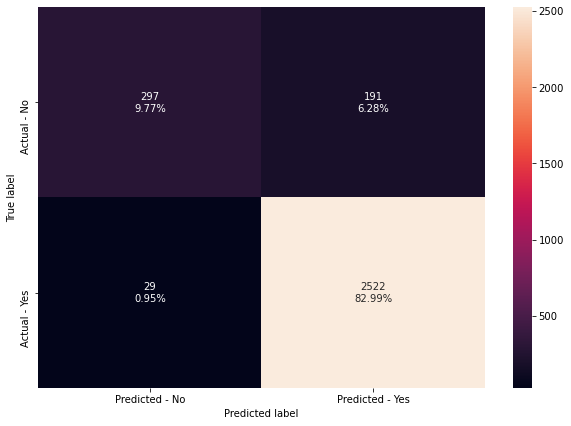

In [265]:
# Calculating different metrics
get_metrics_score(gb_tuned1)

# Creating confusion matrix
make_confusion_matrix(gb_tuned1, y_test)

* Grid search time: 5 min 53 sec
* These results are somewhat better with regard to overfitting than the Random Forest models.
* Our FP have increased which is to be expected when we are trying to minimize the FN. 
* Now to try a Random search version to see if we can improve these scores.

### Random search:

In [269]:
%%time

# Creating pipeline
pipe = make_pipeline(GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {'gradientboostingclassifier__n_estimators' : [25, 200, 300],
    'gradientboostingclassifier__max_features' : ['sqrt', 'auto'],
    'gradientboostingclassifier__min_samples_leaf' : [2, 4, 6, 10],
    'gradientboostingclassifier__min_samples_split' : [1, 2, 3, 4, 6, 8, 10]}
                       
    
    
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gb_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rf_tuned2.best_params_,rf_tuned2.best_score_))

Best parameters are {'gradientboostingclassifier__n_estimators': 25, 'gradientboostingclassifier__min_samples_split': 10, 'gradientboostingclassifier__min_samples_leaf': 4, 'gradientboostingclassifier__max_features': 'sqrt'} with CV score=0.9902504046193752:
CPU times: user 5min 20s, sys: 806 ms, total: 5min 21s
Wall time: 5min 21s


In [270]:
# Creating new pipeline with best parameters as determined above
gb_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1,      
        n_estimators = 25,
        min_samples_leaf=4,
        min_samples_split = 10
    ),
)
# Did not include max_features: 'sqrt' as it is the same as 'auto' which is the default

# Fit the model on training data
gb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(min_samples_leaf=4,
                                            min_samples_split=10,
                                            n_estimators=25, random_state=1))])

Accuracy on training set :  0.9403216704288939
Accuracy on test set :  0.9276077657124054
Recall on training set :  0.9892418893931754
Recall on test set :  0.9886319090552724
Precision on training set :  0.9425048046124279
Precision on test set :  0.9295982307408772


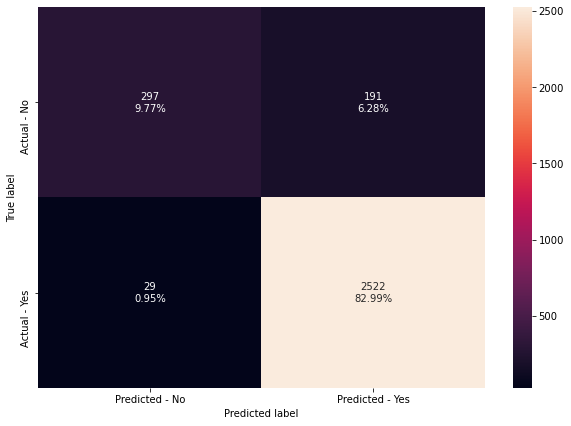

In [271]:
# Calculating different metrics
get_metrics_score(gb_tuned2)

# Creating confusion matrix
make_confusion_matrix(gb_tuned2, y_test)

* Random search time: 5 min 21 seconds (less than the Grid Search version of this model)
* Both the Grid Search model and this Random Search version have the same scores although the parameters are not the same. 
* This model does show signs of overfitting as well. 

# XGBoost:

### Grid search:

In [273]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9979830519255642:
CPU times: user 24.1 s, sys: 4.68 s, total: 28.8 s
Wall time: 2h 32min 14s


In [274]:
# Creating new pipeline with best parameters as determined above
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.01,
        gamma=0,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints=None, learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=50,
                               n_jobs=0, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method=None,
                               validate_parameters=False, verbosity=None))])

Accuracy on training set :  0.8889672686230248
Accuracy on test set :  0.8845014807502468
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8831650831353919
Precision on test set :  0.8790489317711923


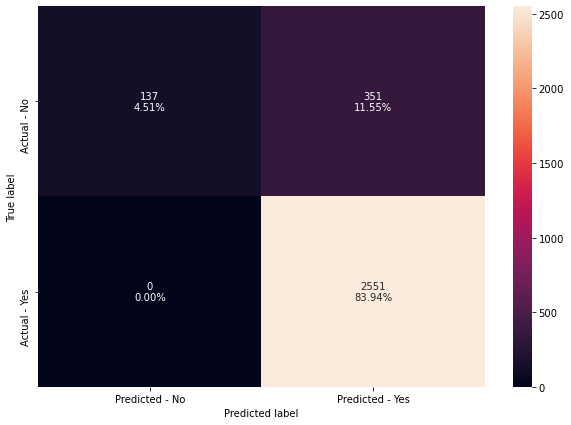

In [275]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

* Grid Search time: 2 hours 32 minutes (the longest we have seen so far)
* Based on the scores, there appears to be overfitting. The FN are at 0 percent and the FP are 12 percent. Recall is at 100 percent (which is why I believe there to be overfitting).

### Random search:

In [276]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 3} with CV score=1.0:
CPU times: user 6min 16s, sys: 613 ms, total: 6min 17s
Wall time: 1min 36s


In [277]:
# Creating new pipeline with best parameters as determined above
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                gamma=3,
                subsample=0.8,
                learning_rate= 0.05,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints=None, learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=50,
                               n_jobs=0, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.8, tree_method=None,
                               validate_parameters=False, verbosity=None))])

Accuracy on training set :  0.8532731376975169
Accuracy on test set :  0.8519249753208292
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8511947345829161
Precision on test set :  0.850049983338887


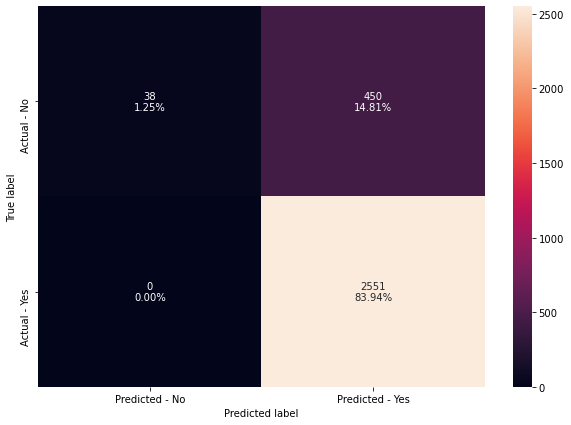

In [278]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

* Random search time: 1 min 36 seconds (This is one of the shortest times we have seen so far.
* Our TP have dropped and the FP have increased even more. With recall score being 100 percent still, this is an overfitted model in my opinion.

# Compare all the models:

In [322]:
# defining list of models
models = [rf_tuned1, rf_tuned2, gb_tuned1, gb_tuned2, xgb_tuned1, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [325]:
comparison_frame = pd.DataFrame({'Model':['Random Forest with Grid Search','Random Forest with Random Search',
                                          'Gradient Boost with Grid Search','Gradient Boost with Random Search',
                                          'XGBoost with Grid Search', 'XGBoost with Random Search'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
4           XGBoost with Grid Search        0.888967       0.884501   
5         XGBoost with Random Search        0.853273       0.851925   
1   Random Forest with Random Search        0.991259       0.990200   
0     Random Forest with Grid Search        0.999859       0.949325   
2    Gradient Boost with Grid Search        0.940322       0.927608   
3  Gradient Boost with Random Search        0.940322       0.927608   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
4      1.000000     1.000000         0.883165        0.879049  
5      1.000000     1.000000         0.851195        0.850050  
1      0.991259     0.990200         0.913414        0.909287  
0      1.000000     0.989808         0.999832        0.951753  
2      0.989242     0.988632         0.942505        0.929598  
3      0.989242     0.988632         0.942505        0.929598

* Based on the recall scores from all 6 models, the model with the best recall score was the XGBoost with Grid Search model. This model's run time was the longest at 2 hours and 32 minutes (XGBoost with Random Search had a run time of only 1 min 36 seconds which is the fastest!) and shows a high resource consumption which can be off-putting. The long computational time can be considered a problem as it suggests there is opportunity for errors/fraud to go undetected. With the recall scores being at a perfect mark, shows signs of overfitting and recommend further development of this model as more data comes available. 
* The fact that the XGBoost models have lower accuracy and precision score than the other models is a good sign. That hopefully means when they are tested with real world data, there overall performance will hold up.
* The Random Forest scores are all so high across the board which could mean they would not hold up when tested with real world data (obvious signs of overfitting). The models run time were both a little over 2 minutes which are a vast improvement from the run times for the XGBoost model with Grid Search.
* The Gradient Boost models have more realistic overall numbers and could possibly out perform the other models real world. There are still signs of overfitting that would need to be addressed first. The run times for these models was just over 5 minutes which is not a bad performance comparative to the XGBoost with Grid Search model.
* For the purpose of this project, we will choose the XGBoost model with Grid Search. It was ranked the highest with regard to recall and its other scores. Now we can look at what features it determines to be the most important.

### Important features determined by the model:

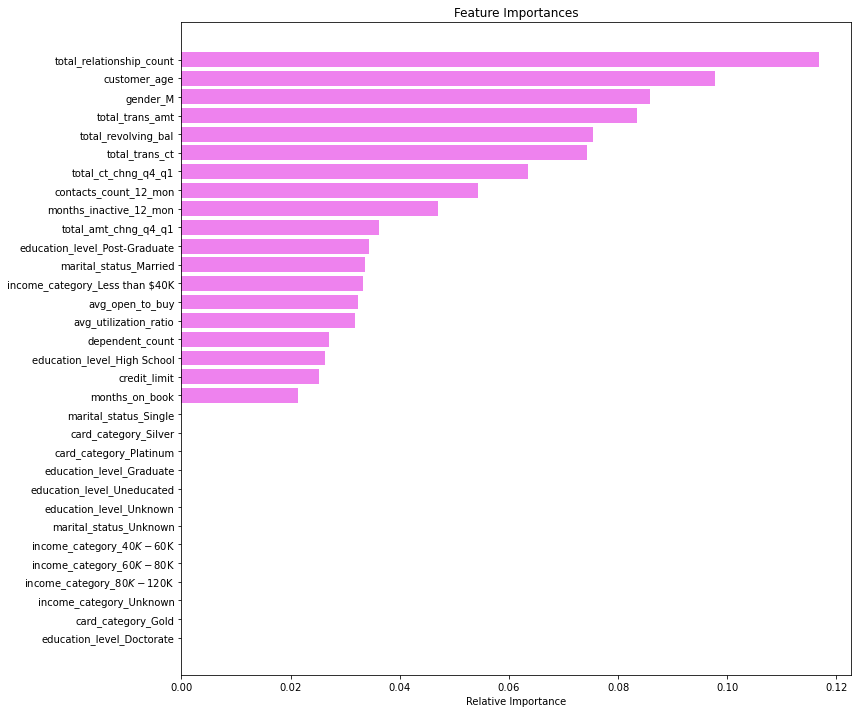

In [333]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total relationship count is by far the largest predictor of whether or not the clients will attrite or not. This feature is followed by customer age, Male selected as a gender, total transaction amount, total revolving balance, total transaction count, total count change from Q4 to Q1, count of contacts over 12 months, and months inactive over 12 months.
* The remaining features have a relative importance rating under .05 so in my opinion we would only add these features into an updated model if we can see a significant increase in the value they add.  
* Let's compare the two different clients based on these important features.

# Client Insights:

* Use filter and groupby functions to narrow our vision of both existing and attrited clients. Also derive greater client insights by selecting the features found to be the most impactful via our model.

In [337]:
# Create a separate df for overall comparison purposes
client_insights=df.filter(['attrition_flag','customer_age', 'gender', 'dependent_count', 'education_level', 'marital_status', 'income_category', 'card_category'] )
client_insights.head()

attrition_flag  customer_age gender  dependent_count education_level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  marital_status income_category card_category  
0        Married     $60K - $80K          Blue  
1         Single  Less than $40K          Blue  
2        Married    $80K - $120K          Blue  
3        Unknown  Less than $40K          Blue  
4        Married     $60K - $80K          Blue

In [338]:
# Review categorical information based on the attrition of the client for a basic client profile/demographic
client_insights.groupby(client_insights.attrition_flag).describe(include=['category'])

gender                  education_level                   \
                   count unique top  freq           count unique       top   
attrition_flag                                                               
Attrited Customer   1627      2   F   930            1627      7  Graduate   
Existing Customer   8500      2   F  4428            8500      7  Graduate   

                        marital_status                       income_category  \
                   freq          count unique      top  freq           count   
attrition_flag                                                                 
Attrited Customer   487           1627      4  Married   709            1627   
Existing Customer  2641           8500      4  Married  3978            8500   

                                               card_category               \
                  unique             top  freq         count unique   top   
attrition_flag                                                              
Attrited Customer      6  Less than $40K   612          1627      4  Blue   
Existing Customer      6  Less than $40K  2949          8500      4  Blue   

                         
                   freq  
attrition_flag           
Attrited Customer  1519  
Existing Customer  7917

* For attrited and existing customers: Majority are female, graduate level education, married and make less than 40K a year and have a blue card.
* For both types of customers, they have the same majority responses for these basic features.

In [321]:
# Check mean of individual columns based on the attrition of the client and compare the mean values for the features found to be most significant by our model.
df.groupby(df.attrition_flag).mean()

customer_age  dependent_count  months_on_book  \
attrition_flag                                                     
Attrited Customer     46.659496         2.402581       36.178242   
Existing Customer     46.262118         2.335412       35.880588   

                   total_relationship_count  months_inactive_12_mon  \
attrition_flag                                                        
Attrited Customer                  3.279656                2.693301   
Existing Customer                  3.914588                2.273765   

                   contacts_count_12_mon  credit_limit  total_revolving_bal  \
attrition_flag                                                                
Attrited Customer               2.972342   8136.039459           672.822987   
Existing Customer               2.356353   8726.877518          1256.604118   

                   avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  \
attrition_flag                                                              
Attrited Customer      7463.216472              0.694277      3095.025814   
Existing Customer      7470.273400              0.772510      4654.655882   

                   total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
attrition_flag                                                                 
Attrited Customer       44.933620             0.554386               0.162475  
Existing Customer       68.672588             0.742434               0.296412

* Customers to profile for insights:
* Attrited customers: 3 total products with the bank, on average is 47 years old, is male, has a Blue card, total transaction amount is a little over 3K, total revolving balance is 673 dollars, total transaction count is 45, their total count change from Q4 to Q1 is .55, their total contacts count for 12 months is 3 on average, and their months inactive on average is 3.

* Existing customers: 4 total products with the bank, on average is 46 years old, is male, has a Blue card, total transaction amount is 4655 dollars, total revolving balance is 1257 dollars, total transaction count is 69, their total count change from Q4 to Q1 is .74, their total contacts count for 12 months is 2 on average, and their months inactive on average is 2. 

# Overall customer insights:

* This shows that clients that remain with the bank have more products, spend more and carry a higher balance over each month, are spending on average 69 dollars a transaction (based on their total transaction amount divided by their total transaction count), spend more in the Q4 (which makes sense since there are major holidays in that time period), have fewer contacts with the bank and fewer months inactive. 

# Business Recommendations:

* The real question is why do the other customers attrite? What can be done to retain them?
* There are many similarities between both client profiles based on the features found to be important. We can learn a lot from the existing clients and the overarching message, in my opinion based on the data, is they have built a relationship with the bank. They have more products, spend more and communicate less. This shows they have confidence in their established relationship.
* How do we turn this information into profit for the bank? 
* The bank needs to retain these clients, continue to build on them while increasing the number of clients. Growth will happen as they offer products and services their clients feel like they need. By tapping in to the clients they currently have relationships with, they can create the products that reflect their needs. As they develop these clients and attract new ones, they can continue to develop products that are relevant to their current client pool. 
* How does the bank accomplish this?
* First, work on client retention by executing a marketing campaign that is geared towards a more relationship/family based perspective. A slogan that centers on "Building Regulars" ie building and strengthening client relationships, company is client-centric etc could evolve the current clients and bring new, potential clients forward.
* Next, the bank can work to establish products that are a reflection of the clients they serve. They could identify clients that would fit well with their current products (Blue card was by far the highest performing card of current offerings) based on the profile of existing clients and work on attracting them to switch to their products. Meanwhile, compile data from both existing and attrited clients about products and services they are looking for. From there, create updated product profiles based on this. It might be incentives or kickbacks based on how much the clients use their cards, etc.   
* Ultimately, the answer lies in gearing their services in such a way they retain the clients they have. Build and strengthen those relationships by having products and services that are a reflection of their needs. Meanwhile, create a client centric profile and attract the customers that best fit the products/services the bank owns. These clients will be attracted to multiple offerings and these are the clients that we want: Those who will sign up for multiple products, carry a balance, and pay on time!    